Aim:
Clean survey dataset
- unify commata to decimals
- clean columns from typos
- define correct datatype to the columns
- select cols wich could be later needed for model development
. combine targets based on compared predictators

In [372]:
import sys, os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio

import re
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')

<Figure size 2000x1000 with 0 Axes>

In [373]:
# load raw survey data

raw_data = pd.read_excel("../input_survey_data/all-attributes_shophouses.xlsx")#, thousands=',')
raw_data.tail(3)

,Q0.1,Q0.2.Ward,Q0.2.District,Q0.3,Q0.4,Q0.5,Q0.6,Q0.7,Pre.Q1,Pre.Q2,P1Q1,P1Q1.specify,P1Q2.1.1,P1Q2.2.1,P1Q2.3.1,P1Q2.4.1,P1Q2.5.1.0,P1Q2.5.1.1,P1Q2.5.1.2,P1Q2.5.1.3,P1Q2.5.1.4,P1Q2.5.1.88,P1Q2.5.1.99,P1Q2.5.1.specify,P1Q2.6.1,P1Q2.7.1.1,P1Q2.7.1.2,P1Q2.7.1.3,P1Q2.7.1.88,P1Q2.7.1.99,P1Q2.7.1.specify,P1Q2.8.1.1,P1Q2.8.1.2,P1Q2.8.1.3,P1Q2.8.1.4,P1Q2.8.1.5,P1Q2.8.1.6,P1Q2.8.1.7,P1Q2.8.1.8,P1Q2.8.1.9,P1Q2.8.1.10,P1Q2.8.1.99,P1Q2.8.1.specify,P1Q2.9.1,P1Q2.10.1.1,P1Q2.10.1.2,P1Q2.10.1.3,P1Q2.10.1.4,P1Q2.10.1.5,P1Q2.10.1.6,P1Q2.10.1.7,P1Q2.10.1.8,P1Q2.10.1.9,P1Q2.10.1.88,P1Q2.10.1.99,P1Q2.10.1.specify,P1Q2.11.1.1,P1Q2.11.1.2,P1Q2.11.1.3,P1Q2.11.1.4,P1Q2.11.1.5,P1Q2.11.1.6,P1Q2.11.1.7,P1Q2.11.1.8,P1Q2.11.1.9,P1Q2.11.1.88,P1Q2.11.1.99,P1Q2.11.1.specify,P1Q3.2.1,P1Q3.3.1,P1Q3.4.1,P1Q3.5.1,P1Q3.6.1,P1Q3.7.1,P1Q3.88.1,P1Q3.88.1.specify,P1Q3.8.1,P1Q3.9.1.man,P1Q3.9.1.days,P1Q3.10.1.1,P1Q3.10.1.2,P1Q3.10.1.3,P1Q3.10.1.4,P1Q3.10.1.5,P1Q3.10.1.6,P1Q3.10.1.88,P1Q3.10.1.99,P1Q3.10.1.specify,P1Q3.11.1,P1Q4.2.1,P1Q4.3.1,P1Q4.4.1,P1Q4.5.1,P1Q4.88.1,P1Q4.88.1.specify,P1Q4.6.1,P1Q5.2.1,P1Q5.3.1,P1Q5.4.1,P1Q5.5.1,P1Q5.88.1,P1Q5.88.1.specify,P1Q5.6.1,P1Q5.7.1,P1Q5.8.1,P1Q5.9.1,P1Q6.2.1.1.relationship,P1Q6.2.1.1.specify,P1Q6.2.1.1.sex,P1Q6.2.1.1.Age,P1Q6.3.1.1.Rank1,P1Q6.3.1.1.Rank2,P1Q6.3.1.1.Rank3,P1Q6.3.1.1.Rank4,P1Q6.3.1.1.Rank5,P1Q6.3.1.1.Rank88,P1Q6.3.1.1.specify,P1Q6.4.1.1,P1Q6.2.1.2.relationship,P1Q6.2.1.2.specify,P1Q6.2.1.2.sex,P1Q6.2.1.2.Age,P1Q6.3.1.2.Rank1,P1Q6.3.1.2.Rank2,P1Q6.3.1.2.Rank3,P1Q6.3.1.2.Rank4,P1Q6.3.1.2.Rank5,P1Q6.3.1.2.Rank88,P1Q6.3.1.2.specify,P1Q6.4.1.2,P1Q6.2.1.3.relationship,P1Q6.2.1.3.specify,P1Q6.2.1.3.sex,P1Q6.2.1.3.Age,P1Q6.3.1.3.Rank1,P1Q6.3.1.3.Rank2,P1Q6.3.1.3.Rank3,P1Q6.3.1.3.Rank4,P1Q6.3.1.3.Rank5,P1Q6.3.1.3.Rank88,P1Q6.3.1.3.specify,P1Q6.4.1.3,P1Q7.2.1.1,P1Q7.2.1.2,P1Q7.2.1.3,P1Q7.2.1.4,P1Q7.2.1.5,P1Q7.2.1.88,P1Q7.2.1.98,P1Q7.2.1.99,P1Q7.2.1.specify,P1Q7.3.1.1,P1Q7.3.1.2,P1Q7.3.1.3,P1Q7.3.1.4,P1Q7.3.1.5,P1Q7.3.1.6,P1Q7.3.1.88,P1Q7.3.1.98,P1Q7.3.1.99,P1Q7.3.1.specify,P1Q2.1.2,P1Q2.2.2,P1Q2.3.2,P1Q2.4.2,P1Q2.5.2.0,P1Q2.5.2.1,P1Q2.5.2.2,P1Q2.5.2.3,P1Q2.5.2.4,P1Q2.5.2.88,P1Q2.5.2.99,P1Q2.5.2.specify,P1Q2.6.2,P1Q2.7.2.1,P1Q2.7.2.2,P1Q2.7.2.3,P1Q2.7.2.88,P1Q2.7.2.99,P1Q2.7.2.specify,P1Q2.8.2.1,P1Q2.8.2.2,P1Q2.8.2.3,P1Q2.8.2.4,P1Q2.8.2.5,P1Q2.8.2.6,P1Q2.8.2.7,P1Q2.8.2.8,P1Q2.8.2.9,P1Q2.8.2.10,P1Q2.8.2.99,P1Q2.8.2.specify,P1Q2.9.2,P1Q2.10.2.1,P1Q2.10.2.2,P1Q2.10.2.3,P1Q2.10.2.4,P1Q2.10.2.5,P1Q2.10.2.6,P1Q2.10.2.7,P1Q2.10.2.8,P1Q2.10.2.9,P1Q2.10.2.88,P1Q2.10.2.99,P1Q2.10.2.specify,P1Q2.11.2.1,P1Q2.11.2.2,P1Q2.11.2.3,P1Q2.11.2.4,P1Q2.11.2.5,P1Q2.11.2.6,P1Q2.11.2.7,P1Q2.11.2.8,P1Q2.11.2.9,P1Q2.11.2.88,P1Q2.11.2.99,P1Q2.11.2.specify,P1Q3.2.2,P1Q3.3.2,P1Q3.4.2,P1Q3.5.2,P1Q3.6.2,P1Q3.7.2,P1Q3.88.2,P1Q3.88.2.specify,P1Q3.8.2,P1Q3.9.2.man,P1Q3.9.2.days,P1Q3.10.2.1,P1Q3.10.2.2,P1Q3.10.2.3,P1Q3.10.2.4,P1Q3.10.2.5,P1Q3.10.2.6,P1Q3.10.2.88,P1Q3.10.2.99,P1Q3.10.2.specify,P1Q3.11.2,P1Q4.2.2,P1Q4.3.2,P1Q4.4.2,P1Q4.5.2,P1Q4.88.2,P1Q4.88.2.specify,P1Q4.6.2,P1Q5.2.2,P1Q5.3.2,P1Q5.4.2,P1Q5.5.2,P1Q5.88.2,P1Q5.88.2.specify,P1Q5.6.2,P1Q5.7.2,P1Q5.8.2,P1Q5.9.2,P1Q6.2.2.1.relationship,P1Q6.2.2.1.specify,P1Q6.2.2.1.sex,P1Q6.2.2.1.Age,P1Q6.3.2.1.Rank1,P1Q6.3.2.1.Rank2,P1Q6.3.2.1.Rank3,P1Q6.3.2.1.Rank4,P1Q6.3.2.1.Rank5,P1Q6.3.2.1.Rank88,P1Q6.3.2.1.specify,P1Q6.4.2.1,P1Q6.2.2.2.relationship,P1Q6.2.2.2.specify,P1Q6.2.2.2.sex,P1Q6.2.2.2.Age,P1Q6.3.2.2.Rank1,P1Q6.3.2.2.Rank2,P1Q6.3.2.2.Rank3,P1Q6.3.2.2.Rank4,P1Q6.3.2.2.Rank5,P1Q6.3.2.2.Rank88,P1Q6.3.2.2.specify,P1Q6.4.2.2,P1Q6.2.2.3.relationship,P1Q6.2.2.3.specify,P1Q6.2.2.3.sex,P1Q6.2.2.3.Age,P1Q6.3.2.3.Rank1,P1Q6.3.2.3.Rank2,P1Q6.3.2.3.Rank3,P1Q6.3.2.3.Rank4,P1Q6.3.2.3.Rank5,P1Q6.3.2.3.Rank88,P1Q6.3.2.3.specify,P1Q6.4.2.3,P1Q7.2.2.1,P1Q7.2.2.2,P1Q7.2.2.3,P1Q7.2.2.4,P1Q7.2.2.5,P1Q7.2.2.88,P1Q7.2.2.98,P1Q7.2.2.99,P1Q7.2.2.specify,P1Q7.3.2.1,P1Q7.3.2.2,P1Q7.3.2.3,P1Q7.3.2.4,P1Q7.3.2.5,P1Q7.3.2.6,P1Q7.3.2.88,P1Q7.3.2.98,P1Q7.3.2.99,P1Q7.3.2.specify,P2Q1.1.implement,P2Q1.1.spend,P2Q1.2.implement,P2Q1.2

#### Targets

In [374]:
df = raw_data

## _r = most recent flood , _s = most serious flood
df.insert(0, "Target_directloss_mVND_r", df.pop("P1Q5.6.1"))  # target var for direct cost on content loss [VND]
df.insert(1, "Target_directloss_mVND_s", df.pop("P1Q5.6.2"))

# explanatory var: monthly reduction of business [%] -> probl influences mainly economic damage costs
df.insert(2, "Target_businessreduction_r", df.pop("P1Q5.9.1"))  
df.insert(3, "Target_businessreduction_s", df.pop("P1Q5.9.2"))



C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2439915075.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, "Target_directloss_mVND_r", df.pop("P1Q5.6.1"))  # target var for direct cost on content loss [VND]
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2439915075.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(1, "Target_directloss_mVND_s", df.pop("P1Q5.6.2"))
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2439915075.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

### Flood times 
### get cases for which flood event are identical

Event dates P1Q2.2.1, P1Q2.2.2. If extreme event is also a recent event then both the events are same [ev1=ev2]. Date-mm-dd-yyy


In [375]:
# rename dates of flood events
df.rename(columns={"P1Q2.2.1": "flood_time_r", "P1Q2.2.2":"flood_time_s"}, inplace=True)
df["flood_time_r_modified"] = pd.NaT
df["flood_time_s_modified"] = pd.NaT

df.flood_time_r =  pd.to_datetime(df.flood_time_r, errors='ignore', format='mixed')
df.flood_time_s =  pd.to_datetime(df.flood_time_s, errors='ignore', format='mixed')

## clean flood time, convert into uniform date format
for i, d in enumerate(df.flood_time_r):
    try: 
        df.flood_time_r[i] = pd.to_datetime(d).strftime('%m/%d/%Y')
        #df["flood_time_r_modified"][i] = False
    except:
        print(df.flood_time_r[i])
        df.flood_time_r[i] = d.replace("99", "01")
        df["flood_time_r_modified"][i] = True

       
for i, d in enumerate(df.flood_time_s):
    try: 
        df.flood_time_s[i] = pd.to_datetime(d).strftime('%m/%d/%Y')  # errors="coerce
        #df["flood_time_s_modified"][i] = False
    except:
        print(df.flood_time_s[i])
        df.flood_time_s[i] = d.replace("99", "01")
        df["flood_time_s_modified"][i] = True


## make a datetime obj
df.flood_time_r = pd.to_datetime(df.flood_time_r)
df.flood_time_s = pd.to_datetime(df.flood_time_s)

## set flood times with unknown years to NAN
df.flood_time_r = df.flood_time_r.replace("1970-01-01", pd.NaT)
df.flood_time_s = df.flood_time_s.replace("1970-01-01", pd.NaT)

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["flood_time_r_modified"] = pd.NaT
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["flood_time_s_modified"] = pd.NaT
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

12/99/2016
10/99/2013
08/99/2020
09/99/2018
09/99/2019
06/99/2017
12/99/2011
08/99/2020
09/99/2017
7/99/2019
12/99/2019
10/99/2019
08/99/2020
09/99/2017
10/99/2019
5/99/2019
09/99/2020
09/99/2020
8/99/2020
08/99/2020
08/99/2020
07/99/2019
09/99/2020
08/99/2013
09/99/2019
12/99/2011
09/99/2017
99/99/2015
09/99/2020
08/99/2020
3/99/2020
12/99/2019
09/99/2016
11/99/2018
99/99/2017
09/99/2014
10/99/2019
99/99/2017
08/99/2018
08/99/2020
09/99/2019
10/99/2019
10/99/2019
08/99/2020
07/99/2016
09/99/2017
10/99/2018
99/99/2015
10/99/2019
99/99/2017
10/99/2018
08/99/2019
12/99/2019
10/99/2019
10/99/2019
08/99/2020
03/99/2020
09/99/2020
09/99/2020
11/99/2017
11/99/2019
12/99/2019
08/99/2020
99/99/2017
08/99/2020
02/99/2020
04/99/2019
12/99/2019
10/99/2019
99/99/2015
07/99/2011
09/99/2020
99/99/2017
08/99/2017


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_r[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_r[i] = pd.to_datetime(d).strftime('%m/%d/%Y')
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

8/99/2014
07/99/2019
05/99/2020
10/99/2013
06/99/2020
7/99/2020
08/99/2017
99/99/2013
10/99/2019
08/99/2020
09/99/2018
09/99/2015
10/99/2019
09/99/2016
8/99/2020
09/99/2020
09/99/2019
07/99/2019
08/99/2017
7/99/2020
99/99/2017
99/99/2019
10/99/2019
08/99/2017
10/99/2013
10/99/2019
08/99/2020
08/99/2020
8/99/2020
09/99/2019
09/99/2020
09/99/2020
10/99/2016
09/99/2020
8/99/2020
11/99/2018
01/99/2015
99/99/2019
99/99/2019
10/99/2019
09/99/2020
08/99/2020
07/99/2010
08/99/2020
09/99/2019
99/99/2019
08/99/2020
09/99/2017
09/99/2018
08/99/2020
10/99/2019
99/99/2018


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_r[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_r[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_r[i

09/99/2020
09/99/2019
09/99/2020
09/99/2020
8/99/2020
10/99/2018
09/99/2017
8/99/2020
99/99/2014
09/99/2010
08/99/2020
09/99/2020
11/99/2019
8/99/2020
09/99/2019
08/99/2019
99/99/2019
8/99/2020
9/99/2019
05/99/2020
10/99/2019
07/99/2020
09/99/2016
8/99/2020
10/99/2020
09/99/2015
1/99/2019
8/99/2020
09/99/2020
7/99/2015
09/99/2019
07/99/2020
12/99/2018
01/99/2019
8/99/2020
10/99/2019
08/99/2020
09/99/2019
09/99/2019
12/99/2019
99/99/2016
99/99/2016
08/99/2020
8/99/2020
08/99/2020
09/99/2019
8/99/2020
11/99/2017
10/99/2018
08/99/2019
9/99/2019
10/99/2017
9/99/2019
99/99/2017
01/99/2020
09/99/2018
09/99/2019
10/99/2014
09/99/2019
09/99/2020
99/99/2017
09/99/2017
10/99/2019
10/99/2019
12/99/2016
10/99/2018
9/99/2019
99/99/2018
09/99/2019
99/99/2018
08/99/2020
09/99/2019
9/99/2020
10/99/2019
12/99/2019
8/99/2020
7/99/2020
08/99/2020
10/99/2018
10/99/2013
09/99/2019
08/99/2012
09/99/2018
08/99/2019
07/99/2010
10/99/2014
08/99/2016
10/99/2019
09/99/2017
7/99/2019
10/99/2019
10/99/2019
09/99/2

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i] = pd.to_datetime(d).strftime('%m/%d/%Y')  # errors="coerce
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

10/99/2017
99/99/2015
07/99/2019
09/99/2020
99/99/2017
08/99/2017
11/99/2017
07/99/2019
10/99/2019
10/99/2016
07/99/2011
99/99/2013
08/99/2017
99/99/2013
10/99/2010
10/99/2019
09/99/2019
09/99/2016
10/99/2019
09/99/2016
10/99/2017
08/99/2017
09/99/2019
07/99/2020
07/99/2017
7/99/2020
99/99/2017
99/99/2019
10/99/2019
08/99/2019
10/99/2014
10/99/2019
10/99/2018
09/99/2019
6/99/2019
11/99/2014
99/99/2017
08/99/2020
99/99/2011
10/99/2018
99/99/2019
99/99/2018
09/99/2018
99/99/2018
99/99/2019
10/99/2016
08/99/2018
10/99/2017
07/99/2016
08/99/2020
09/99/2019
99/99/2019
09/99/2016
09/99/2017
09/99/2018
08/99/2020
09/99/2017
08/99/2017
09/99/2017
09/99/2019
09/99/2020
09/99/2020
01/99/2015
99/99/2019
08/99/2018
12/99/2013
8/99/2020
99/99/2016
09/99/2015
09/99/2010
10/99/2014
09/99/2019
12/99/2011
10/99/2018
09/99/2019
08/99/2020
99/99/2019
9/99/2018
08/99/2020
9/99/2019
06/99/2017
09/99/2019
08/99/2017
10/99/2017
09/99/2017
9/99/2018
11/99/2017
09/99/2016
10/99/2013
8/99/2020
10/99/2013
7/99/2

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i] = d.replace("99", "01")


09/99/2019
09/99/2019
10/99/2017
09/99/2019
08/99/2018
99/99/2017
09/99/2018
99/99/2017
10/99/2019
10/99/2016
10/99/2019
9/99/2019
99/99/2012
09/99/2019
99/99/2018
08/99/2020
09/99/2019
9/99/2020
10/99/2019
10/99/2015
9/99/2019
12/99/2019
7/99/2020
08/99/2020


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i] = d.replace("99", "01")
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3439323928.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flood_time_s[i

In [376]:
#df.flood_time_r = df.flood_time_r.astype(str).replace("/99/", pd.NaT)
df.flood_time_r.value_counts()
df.flood_time_r_modified.value_counts()

#df.flood_time_r.info()

flood_time_r_modified
True    204
Name: count, dtype: int64

In [377]:
print("Cases with same flood dates: ", len(np.where( df.flood_time_r ==  df.flood_time_s)[0]))


Cases with same flood dates:  73


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3176885773.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.protect_valuables = df["P2Q1.1.spend"].replace(r'^,|.,', '', regex=True).astype(str).astype("Int64")  # clean column, keep nan values by using Int64


Text(0, 0.5, 'number of businesses [log]')

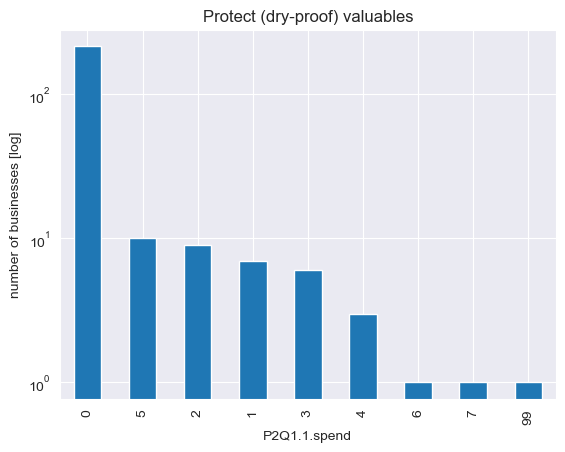

In [378]:
df.protect_valuables = df["P2Q1.1.spend"].replace(r'^,|.,', '', regex=True).astype(str).astype("Int64")  # clean column, keep nan values by using Int64

fig, ax = plt.subplots()
df.protect_valuables.value_counts().plot(ax=ax, title="Protect (dry-proof) valuables", kind='bar')
ax.set_yscale('log')
ax.set_ylabel("number of businesses [log]")



##### rename columns

In [379]:
## rename certain columns which could be needed as candidate predictors


##  vars to strucual characteristics of buildings - could influcence cotnent losses (Schoppa)
    ## eg material of wall, elevation rel to surrounding, + rneeovations

## chinh2015: wi (indic flood warnin info), wte elapsed timeout using for emergency,

# expectation, perception of eff of privte precuation 
## DONE  include what people expect from governm - influences their behavoir and implemented measures to prevent losses (vmtl Leitpold)
# age interview person, hh size, ovwnership
# socp socio eco status acc Plapp


col_names = {        'P1Q1':'flood_experience',  #  flood_experience indicator
                     'P1Q2.3.1':'inundation_duration_h_r',
                     'P1Q2.3.2':'inundation_duration_h_s',
                     'P1Q2.4.1':'water_depth_cm_r',
                     'P1Q2.4.2':'water_depth_cm_s',
                     'P1Q2.5.1':'contaminations_r',   # mulitple choice                  
                     'P1Q2.5.2':'contaminations_s',    # mulitple choice  
                     'P1Q2.6.1':'flowvelocity_r',  # kept as preidctor, due strong velocity can cuase more damages
                     'P1Q2.6.2':'flowvelocity_s', 
                     'P1Q2.7.1':'main_causes_r',  # mulitple choice
                     'P1Q2.7.2':'main_causes_s',  # mulitple choice
                     'P1Q2.8.1':'warning_type_r',  # mulitple choice +.1-.10 + .99
                     'P1Q2.8.2':'warning_type_s',  # mulitple choice +.1-.10 + .99
                     'P1Q2.9.1':'warning_time_h_r',  # not necissarly 118=didnt reply -can mean anything, flood_experience indicator, knowledge of flood hazard convert maybe as binary (no/yes)
                     'P1Q2.9.2':'warning_time_h_s',  
                     'P1Q2.10.1':'emergency_measures_r', # mulitple choice, .1-.9
                     'P1Q2.10.2':'emergency_measures_s', # mulitple choice, .1-.9
                     'P1Q2.11.1':'overall_problem_house_r', # mulitple choice, maybe rm (TODO check literature which vars used)
                     'P1Q2.11.2':'overall_problem_house_s', # mulitple choice

                     'P1Q3.2.1':'damage_level_floor_r',
                     'P1Q3.2.2':'damage_level_floor_s',
                     'P1Q3.3.1':'damage_level_walls_r',
                     'P1Q3.3.2':'damage_level_walls_s',
                     'P1Q3.4.1':'damage_level_foundation_r',
                     'P1Q3.4.2':'damage_level_foundation_s',
                     'P1Q3.5.1':'damage_level_doors_r',
                     'P1Q3.5.2':'damage_level_doors_s',
                     'P1Q3.6.1':'damage_level_roof_r',
                     'P1Q3.6.2':'damage_level_roof_s',
                     'P1Q3.7.1':'damage_level_basement_r',
                     'P1Q3.7.2':'damage_level_basement_s',
                     'P1Q3.88.1':'damage_level_other_r',
                     'P1Q3.88.2':'damage_level_other_s',
                     'P1Q3.88.1.specify':'damage_level_specify_r',
                     'P1Q3.88.2.specify':'damage_level_specify_s',
                     'P1Q3.8.1':'repair_costs_building_VND_r',
                     'P1Q3.8.2':'repair_costs_building_VND_s',
                     'P1Q3.10.1':'reason_why_not_repaired_business_r', # mulitple choice
                     'P1Q3.10.2':'reason_why_not_repaired_business_s',  # mulitple choice
                     
                     'P1Q3.11.1':'repair_costs_building_complete_mVND_r',
                     'P1Q3.11.2':'repair_costs_building_complete_mVND_s',
                     #'P1Q4.6.1':'repair_costs_residentail_contents_VND_r',
                     #'P1Q4.6.2':'repair_costs_residentail_contents_VND_s',
                     'P1Q5.2.1':'shpdamage_level_furniture_r',
                     'P1Q5.3.1':'shpdamage_level_electronics_r',
                     'P1Q5.4.1':'shpdamage_level_equipment_r',
                     'P1Q5.5.1':'shpdamage_level_products_r',
                     'P1Q5.88.1':'shpdamage_level_others_r',
                     'P1Q5.2.2':'shpdamage_level_furniture_s',
                     'P1Q5.3.2':'shpdamage_level_electronics_s',
                     'P1Q5.4.2':'shpdamage_level_equipment_s',
                     'P1Q5.5.2':'shpdamage_level_products_s',
                     'P1Q5.88.2':'shpdamage_level_others_s',
                    # 'P1Q5.6.2':'shp_total_direct_loss_content',  ## TARGET 1 
                     'P1Q5.7.1':'shp_closed_d_r',
                     'P1Q5.7.2':'shp_closed_d_s',
                     'P1Q5.8.1':'shp_duration_back2normal_r',
                     'P1Q5.8.2':'shp_duration_back2normal_s',
                    # P1Q5.9.1 P1Q5.9.2 possile TARGETs, currently expl. var: Target_businessreduction_.
                     'P1Q6.4.1':'hh_drop_out_from_work_d_r', # P1Q6.4.1.1-.3,
                     'P1Q6.4.2': 'hh_drop_out_from_work_d_s',

                     'P2Q1.1.implement':'protect_valuables_impl',
                     'P2Q1.1.spend':'protect_valuables_VND_spnd',
                     'P2Q1.2.implement':'water_barries_impl',
                     'P2Q1.2.spend':'water_barries_VND_spnd',
                     'P2Q1.3.implement':'pumping_equipment_impl',
                     'P2Q1.3.spend':'pumping_equipment_VND_spnd',
                     'P2Q1.4.implement':'elevation_building_impl',
                     'P2Q1.4.spend':'elevation_building_VND_spnd',
                     'P2Q1.5.implement':'resistant_material_building_impl',
                     'P2Q1.5.spend':'resistant_material_building_VND_spnd',
                     'P2Q1.6.implement':'electricity_higher_impl',
                     'P2Q1.6.spend':'electricity_higher_VND_spnd',
                     'P2Q1.7.implement':'flood_protections_impl',
                     'P2Q1.7.spend':'flood_protections_VND_spnd',
                     'P2Q2.1.1':'elevation_building_year',
                     'P2Q2.2':'elevation_building_height_cm',
                     'P2Q2.3':'elevation_building_elements',
                     'P2Q2.4':'elevation_building_material_costs_VND',
                     'P2Q3.1.1':'insurance_building_VND',
                     'P2Q3.2.1':'insurance_business_VND',
                     
                     'P3Q1.1':'resilience_city_protection',
                     'P3Q1.2':'resilience_more_future_affected',
                     'P3Q1.3':'resilience_govern_warnings_helpful',
                     'P3Q1.4':'resilience_govern_careing',
                     'P3Q1.5':'resilience_govern_careing_increasing',
                     'P3Q1.6':'resilience_left_alone',
                     'P3Q1.7':'resilience_neighbor_management',
                      # currently not impl P3Q2.1-2: flood perception (eg. if flood changed during last 10 years or expected to change)
                     'P3Q2.3':'perception_who_responsible4protection',  # ie. take only first Rank whic his the most important, Rank1-7, Rank88, .specify
                     'P3Q2.4':'perception_govern_support_past',  
                     'P3Q2.5':'perception_govern_support_future',  
                     'P3Q2.6':'perception_private_economy_future',  
  
                     # curr not impl P3Q3.1-11: if worst flood happens 3 times more every year (eg. how likely income losses, traffic syste collaps, shop house resist in such extreme flood scenario?)
  
                     'P4Q1.6':'people_com',	
                     'P4Q1.8':'household_education',
                     'P4Q1.9':'poverty_cert',                     
                     'P4Q1.10':'household_monthly_income_catego',
                     'P4Q2.1':'building_movingin',
                     'P4Q2.2':'building_year', 
                     'P4Q2.3':'building_floorsize_sqm',
                     'P4Q2.5':'building_value_mVND',
                     'P4Q2.4':'lu_cert',
                     'P4Q3.1':'building_material_foundation', 
                     'P4Q3.2':'building_material_floor',
                     'P4Q3.3':'building_material_wall',
                     'P4Q3.4':'building_material_roof',
                     'P4Q3.5':'building_material_doors',
                     r'P4Q3.6$':'building_elevation_rel2surrounding_cat', 
                     'P4Q3.6.cm':'building_elevation_rel2surrounding_cm', 
                     'P4Q4.3.1':'building_renovation_elements_r',  # mulitple choice
                     'P4Q4.3.2':'building_renovation_elements_s',  # multiple choice
                     'P4Q4.1': 'renovation_since_2010',  # binary: 1=yes, 2=no, 99=dont know
                     'P4Q4.4.1':'building_renovation_reasons_r',  # multiple choice
                     'P4Q4.4.2':'building_renovation_reasons_s',  # multiple choice
                     'P4Q4.5.1':'building_renovation_cost_mVND_r', 
                     'P4Q4.5.2':'building_renovation_cost_mVND_s',  

                     r'P5Q1.1$':'shp_owner',
                     'P5Q1.2':'shp_established',
                     'P5Q1.3':'shp_sector', 
                     'P5Q1.4':'shp_employees',
                     'P5Q1.5':'shp_avgmonthly_sale_catego',
                     'P5Q1.6.1':'shp_finance_investments',
                     'P5Q1.7':'shp_capital_mVND',
                     'P5Q1.9':'shp_suppliers_location',
                     'P5Q1.10':'shp_profits_last5years',
                     'P5Q1.11':'shp_risk_tolerance',
                     'P5Q1.12':'shp_monetary_resources_prevention',
}
# P1Q7.1.1 and .2 = from whom recieved help


for k, v in col_names.items():
#    df.rename(columns ={ i: i.replace({k: v}, regex=True) for i in  df.columns }, inplace=True )
    df.rename(columns ={ i: re.sub(k, v, i) for i in  df.columns }, inplace=True )



### Damage Variables

In [380]:
vars_dam = pd.concat([df.loc[ :, "flood_time_r":"flowvelocity_r"],
                      df.loc[ :, "warning_time_h_r":"overall_problem_house_r.99"],
                      df.loc[ :, "flood_time_s":"flowvelocity_s"],
                      df.loc[ :, "warning_time_h_s":"overall_problem_house_s.99"],
                     ], axis=1)

# drop string columns (all cols ending with 88, 99, specify)
vars_dam = vars_dam.loc[:, ~vars_dam.columns.str.contains(r"(.88)$|(.99)$|(.specify)$")]
vars_dam


## TODO Q: should do it on all contamination types also for .2, .1 ..
vars_dam["contaminations_r.0"] = vars_dam["contaminations_r.0"].replace(np.nan, 0)
vars_dam["contaminations_r.1"] = vars_dam["contaminations_r.1"].replace(np.nan, 0)
vars_dam["contaminations_r.2"] = vars_dam["contaminations_r.2"].replace(np.nan, 0)
vars_dam["contaminations_r.3"] = vars_dam["contaminations_r.3"].replace(np.nan, 0)
vars_dam["contaminations_r.4"] = vars_dam["contaminations_r.4"].replace(np.nan, 0)

vars_dam["contaminations_s.0"] = vars_dam["contaminations_s.0"].replace(np.nan, 0)
vars_dam["contaminations_s.1"] = vars_dam["contaminations_s.1"].replace(np.nan, 0)
vars_dam["contaminations_s.2"] = vars_dam["contaminations_s.2"].replace(np.nan, 0)
vars_dam["contaminations_s.3"] = vars_dam["contaminations_s.3"].replace(np.nan, 0)
vars_dam["contaminations_s.4"] = vars_dam["contaminations_s.4"].replace(np.nan, 0)


vars_dam.warning_time_h_r = vars_dam.warning_time_h_r.replace(np.nan, 99)
vars_dam.warning_time_h_s = vars_dam.warning_time_h_s.replace(np.nan, 99)

vars_dam


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2822272216.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  vars_dam = vars_dam.loc[:, ~vars_dam.columns.str.contains(r"(.88)$|(.99)$|(.specify)$")]


,flood_time_r,inundation_duration_h_r,water_depth_cm_r,contaminations_r.0,contaminations_r.1,contaminations_r.2,contaminations_r.3,contaminations_r.4,flowvelocity_r,warning_time_h_r,emergency_measures_r.1,emergency_measures_r.2,emergency_measures_r.3,emergency_measures_r.4,emergency_measures_r.5,emergency_measures_r.6,emergency_measures_r.7,emergency_measures_r.8,emergency_measures_r.9,overall_problem_house_r.1,overall_problem_house_r.2,overall_problem_house_r.3,overall_problem_house_r.4,overall_problem_house_r.5,overall_problem_house_r.6,overall_problem_house_r.7,overall_problem_house_r.8,overall_problem_house_r.9,flood_time_s,inundation_duration_h_s,water_depth_cm_s,contaminations_s.0,contaminations_s.1,contaminations_s.2,contaminations_s.3,contaminations_s.4,flowvelocity_s,warning_time_h_s,emergency_measures_s.1,emergency_measures_s.2,emergency_measures_s.3,emergency_measures_s.4,emergency_measures_s.5,emergency_measures_s.6,emergency_measures_s.7,emergency_measures_s.8,emergency_measures_s.9,overall_problem_house_s.1,overall_problem_house_s.2,overall_problem_house_s.3,overall_problem_house_s.4,overall_problem_house_s.5,overall_problem_house_s.6,overall_problem_house_s.7,overall_problem_house_s.8,overall_problem_house_s.9
0,2020-09-01,1,50,0,1,0,0,0,3,,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2017-08-28,1,50,0,1,0,0,0,5,,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0
1,2016-12-01,1,10,0,1,0,0,1,2,,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2018-10-01,5,40,0,1,0,0,1,3,,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,2013-10-01,1,30,0,1,0,0,1,3,,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,2013-10-01,1,30,0,1,0,0,1,3,,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,2020-08-15,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2019-09-01,3,5,0,1,0,1,1,4,,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,2020-08-01,1,30,0,0,0,0,1,2,99,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2012-08-01,2,50,0,0,0,0,1,4,99,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2019-12-01,",5",5,1,0,0,0,0,1,,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2019-09-01,",5",10,1,0,0,0,0,1,,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
248,2020-08-06,"0,5",10,0,1,0,0,0,2,99,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-08-06,",5",10,0,1,0,0,0,2,99,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
249,2020-08-01,"0,5",10,0,1,0,0,1,4,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,2019-12-01,2,30,0,1,0,0,1,3,",5",0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
250,2020-07-01,"0,5",3,1,0,0,0,0,2,,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2020-07-01,",2",3,1,0,0,0,0,2,,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


#### Identical events
Same matrix indicates 1 for a given damage variable when households have different value for flood_time_r & flood_time_s, 0 when households have same value for flood_time_r & flood_time_s

It is assumed that if the damage variables value are same for the 2 events then the two events are the same. 

In [381]:
## iterate over cols -> check if each value in col for recent events is identical with value in the other respective col for serious events
col_len = len(vars_dam.columns)//2
df_same = pd.DataFrame(index=range(len(vars_dam)), columns=range(col_len)) # init binary df - indicating if certain cols are the same

for c in range(col_len):
    for r in range(len(vars_dam)):
        if vars_dam.iloc[r, c] == vars_dam.iloc[r, c + col_len]:
            df_same.iloc[r, c] = 1
        if vars_dam.iloc[r, c] != vars_dam.iloc[r, c + col_len]:
            df_same.iloc[r, c] = 0

df_same.tail(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
249,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
250,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
251,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [382]:
## create indidcator in  one col, showing if events are equal
vars_dam["same"] = pd.Series() # init column indicating if both events are the same

for r in range(len(vars_dam)):
    vars_dam.same[r] = (df_same.iloc[r, :] == 1).all()


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_dam.same[r] = (df_same.iloc[r, :] == 1).all()
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_dam.same[r] = (df_same.iloc[r, :] == 1).all()
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_dam.same[r] = (df_same.iloc[r, :] == 1).all()
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_dam.same[r] = (df_same.iloc[r, :] == 1).all()
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2746083047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars

In [383]:
print("Cases for which both events are different based on identical damage variables and flood time :", vars_dam.same.value_counts()[0])
print("Cases for which both events are identical based on idenitcal damage variables and flood time :", vars_dam.same.value_counts()[1])


Cases for which both events are different based on identical damage variables and flood time : 190
Cases for which both events are identical based on idenitcal damage variables and flood time : 62


### Precautionary measures 
– transform it to binary variable [0,1] – 0 when the measure is implemented before the event – options 1 or 3 for the serious event and options 2 or 3 for the recent event. Options 1, 2 or 3 if recent is also the serious event.


In [384]:
# initialize empty columns for precautionary measurment implementations
prec_measures_impl_colnames_r = []
prec_measures_impl_colnames_s = []

for c in  df.filter(regex="_impl$", axis=1).columns:
    prec_measures_impl_colnames_r.append(c + "_r")
    prec_measures_impl_colnames_s.append(c + "_s")

vars_dam[prec_measures_impl_colnames_r] = 0
vars_dam[prec_measures_impl_colnames_s] = 0


vars_dam["flood_experience"]  = df.flood_experience


In [385]:
##In the dataset for loss estimation, count the repeat events as 1 and remove duplicates
#Total events (190*2 + 62*1) -> 442 cases

#c input dataset: vars_dam upto P1Q2.10; Precautionary measures   
pre_vars = df.filter(regex="_impl$", axis=1)

In [386]:
## 1 - before serious, 2 - before recent, 3 - before both, 4 - after both, 5 - did not implement
print(vars_dam[prec_measures_impl_colnames_r].head())

# identical events
idx_identical_events = vars_dam.loc[vars_dam.same==True, :].index
## Options 1, 2 or 3 if recent is also the serious event
vars_dam.loc[idx_identical_events, ["prec_measures_impl_colnames_r", "prec_measures_impl_colnames_s"]] = pre_vars.loc[idx_identical_events,:].replace( {1:1, 2:1, 3:1})
print(vars_dam[prec_measures_impl_colnames_r].head())

# ## remaining events (not dublicated)
# ## Recent 
# vars_dam[prec_measures_impl_colnames_r] = pre_vars.replace( {2:1, 3:1}) # set precautionary measures to 1 before event happend
# ## Serious
# vars_dam[prec_measures_impl_colnames_s] = pre_vars.replace({1:1, 3:1}) # set precautionary measures to 1 before event happend

# print(vars_dam[prec_measures_impl_colnames_r].head())


   protect_valuables_impl_r  water_barries_impl_r  pumping_equipment_impl_r   
0                         0                     0                         0  \
1                         0                     0                         0   
2                         0                     0                         0   
3                         0                     0                         0   
4                         0                     0                         0   

   elevation_building_impl_r  resistant_material_building_impl_r   
0                          0                                   0  \
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          0                                   0   

   electricity_higher_impl_r  flood_protections_impl_r  
0                          0                         0  
1 

In [387]:
#tr 
# trr = vars_dam[prec_measures_impl_colnames_r]
# trr.columns = trr.columns.str.replace(r"_r$", "", regex=True)
# (trr == tr)

vars_dam.loc[vars_dam.same==True, "protect_valuables_impl_r"].replace( {1:1, 2:1, 3:1})
#vars_dam[prec_measures_impl_colnames_r]

2      0
5      0
11     0
12     0
14     0
      ..
241    0
242    0
243    0
244    0
245    0
Name: protect_valuables_impl_r, Length: 62, dtype: int64

### Socio-economic variables


In [388]:
part4Q1_cols_list = [r"Target_directloss_*", r"Target_businessreduction_*", r'^household_*', 
                        r"shp_closed_d*", r"shp_sector$", "shp_owner",
                        r"shp_*", # P5.Q1.1 - P5.Q1.13 
                    # 'P4Q1.2','P4Q1.3','P4Q1.4',  # elderly +65y, +75y, children,
                    # 'P4Q1.5.0','P4Q1.5.1','P4Q1.5.2','P4Q1.5.3',  # =  health condition
                   # 'P4Q1.5.4','P4Q1.5.5','P4Q1.5.6','P4Q1.5.7'    # = health condition
                    'people_com', 'poverty_cert'  # people_com=P4Q1.6, poverty_cert=P4Q1.9
                    ] # household_^_*= P4Q1.1, P4Q1.8, P4Q1.10 (not included if people part of organsations=P4Q1.7.1-5)


pattern_part4Q1_cols = re.compile('|'.join(part4Q1_cols_list))
vars_soc = df.filter(regex=pattern_part4Q1_cols, axis=1)

vars_soc["people_com"] = vars_soc["people_com"].replace(2, 0)
vars_soc["poverty_cert"] = vars_soc["poverty_cert"].replace(2, 0)

## data cleaning
vars_soc.drop(list(vars_soc.filter(regex = '\.specify$')), axis = 1, inplace = True)  # drop ".specify" columns
vars_soc = vars_soc.replace(' ', np.nan)
vars_soc = vars_soc.replace(r'^,', '0.', regex=True) # convert e.g ,5 -> 0,5
vars_soc = vars_soc.replace(',', '.', regex=True).astype(float) 

vars_soc = vars_soc.astype("float")#.info()


#For building variables - during serious and recent events - building age; how long has the 
#householder lived in the location. LU certificate, building cost.
vars_bui = df.loc[:,['lu_cert','building_value_mVND']]
vars_bui["ba"] = df.building_floorsize_sqm.replace(r'^,', '0.', regex=True) # convert e.g ,5 -> 0,5
vars_bui.ba = vars_bui.ba.replace(',', '.', regex=True).astype(float)  # building_floorsize_sqm = P4Q2.3
flood_year_r = pd.to_datetime(df["flood_time_r"]).dt.strftime('%Y')
flood_year_s = pd.to_datetime(df["flood_time_s"]).dt.strftime('%Y')

vars_bui["flood_year_r"] = flood_year_r
vars_bui["flood_year_s"] = flood_year_s

 

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3097523496.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_soc["people_com"] = vars_soc["people_com"].replace(2, 0)
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3097523496.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_soc["poverty_cert"] = vars_soc["poverty_cert"].replace(2, 0)
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\3097523496.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

### Perception variables
Influences behavior of citizens
More measures undertaken from government lead to less private emergency and precaution measures (see e.g Leitpold 2019)

In [389]:
part3Q1Q2_cols_list = [r"resilience_*", r"^perception_*"] 

pattern_part3Q1Q2_cols = re.compile('|'.join(part3Q1Q2_cols_list))
vars_perception = df.filter(regex=pattern_part3Q1Q2_cols, axis=1)
vars_perception.drop(list(vars_perception.filter(regex = '\.specify$')), axis = 1, inplace = True)  # drop ".specify" columns

vars_soc = pd.concat([vars_soc, vars_perception], axis=1)

C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\1007332298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_perception.drop(list(vars_perception.filter(regex = '\.specify$')), axis = 1, inplace = True)  # drop ".specify" columns


### building variables

In [390]:
## TODO check if building_movingin is same as shp_established
#df.building_movingin.describe()
t = df[df.shp_established!=99.0]
t.shp_established.describe()

count     250.000000
mean     2008.108000
std         8.493816
min      1976.000000
25%      2003.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: shp_established, dtype: float64

In [391]:
df.building_movingin = df.building_movingin.replace(99, np.nan)  # P4Q2.1  
df.building_year = df.building_year.replace(99, np.nan)  # P4Q2.2
#data1$P4Q2.2[which(as.numeric(data1$P4Q2.2)==99)] = NA

## TODO adapt this to businesses --> Q: replace hh_movingin by shp_estbalished, but what if shop was establshed somewhere else and than just moved to this locatio later?
## extract cases where building construction or moving in of the households was after the flood event
vars_bui["occ_yrs_r"] = flood_year_r.astype("Int64") - df.building_movingin.astype("Int64")  
vars_bui["occ_yrs_s"] = flood_year_s.astype("Int64") - df.building_movingin.astype("Int64")

vars_bui["bage_r"] = flood_year_r.astype("Int64") - df.building_year.astype("Int64")
vars_bui["bage_s"] = flood_year_s.astype("Int64") - df.building_year.astype("Int64")

## TODO adapt this to businesses
#For physical damage, if the householder did not live 
#in this house during the reported flood events, we remove those records from further analysis.
#Valid = 1; not valid = 0
vars_bui['valid_r'] = 1
vars_bui['valid_s'] = 1
#vars_bui.loc[vars_bui.occ_yrs_r < 0, "valid_r"] = 0  # set all cases which moved in or where building was constructed after event to zero
vars_bui.loc[vars_bui.occ_yrs_s < 0.0, "valid_s"] = 0
vars_bui['valid_r'][vars_bui.occ_yrs_r < 0.0 ] = 0


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2912926349.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_bui['valid_r'][vars_bui.occ_yrs_r < 0.0 ] = 0


In [392]:
vars_bui.loc[vars_bui["valid_r"]==0]#.describe()
#vars_bui.loc[vars_bui.occ_yrs_s < 0.0, "valid_s"] = 0
#vars_bui['valid_s'][vars_bui.occ_yrs_s <= 0.0 ]

,lu_cert,building_value_mVND,ba,flood_year_r,flood_year_s,occ_yrs_r,occ_yrs_s,bage_r,bage_s,valid_r,valid_s
145,1,1000,150.0,2010,2016,-3,3,-7,-1,0,1


### Renovation

In [393]:
#Renovation: If major renovation -> change bage to that. Otherwise, original bage

ren1= df["P4Q4.2.1"] # first renovation
ren2 = df["P4Q4.2.2"]  # second renovaton

## clean renonvation time, convert into uniform date format

ren1 = ren1.replace({r"^99":"01", np.nan:"01/01/2000", " ": "01/01/2000"}, regex=True)
ren2 = ren2.replace({r"^99":"01", np.nan:"01/01/2000", " ": "01/01/2000"}, regex=True)


## fix dates where only year exists
for i, d in enumerate(ren1):
    if (type(d) == int) & (len(str(d))==4):
        d = f"01/01/{d}"
        ren1[i] = pd.to_datetime(d).strftime('%m/%d/%Y')

for i, d  in enumerate(ren2):
    if (type(d) == int) & (len(str(d))==4):
        d = f"01/01/{d}"
        ren2[i] = pd.to_datetime(d).strftime('%m/%d/%Y')


ren1 = pd.to_datetime(ren1).dt.strftime('%m/%d/%Y') # convert remaining mix of formats to date
ren2 = pd.to_datetime(ren2).dt.strftime('%m/%d/%Y')

ren1_year = pd.to_datetime(ren1).dt.year
ren2_year =pd.to_datetime(ren2).dt.year

ren1_year = ren1_year.replace({2000:np.nan, 99:np.nan})
ren2_year = ren2_year.replace({2000:np.nan, 99:np.nan})


In [394]:
## Recent events
ren1_ev_r = flood_year_r.astype("Int64") - (ren1_year).astype("Int64")
ren2_ev_r = flood_year_r.astype("Int64") - (ren2_year).astype("Int64")
ren1_ev_r.loc[ren1_ev_r < 0] = np.nan   # replace when renovations were before flood events
ren2_ev_r.loc[ren2_ev_r < 0] = np.nan

rec_ren_year = pd.concat([ren1_ev_r, ren2_ev_r], axis=1).min(axis=1, skipna=True)


## Serious events 
ren1_ev_s = flood_year_s.astype("Int64") - (ren1_year).astype("Int64")
ren2_ev_s = flood_year_s.astype("Int64") - (ren2_year).astype("Int64")

ren1_ev_s[ren1_ev_s < 0] = np.nan  # replace when renovations were before flood events
ren2_ev_s[ren2_ev_s < 0] = np.nan

ext_ren_year = pd.concat([ren1_ev_s, ren2_ev_s], axis=1).min(axis=1, skipna=True)

ext_ren_year.loc[ext_ren_year<0] = df.building_year.astype("Int64")[ext_ren_year<0]
ext_ren_year.loc[ext_ren_year == 99] = np.nan

In [395]:
vars_bui["bage_ren1"] = vars_bui.bage_r.copy()
vars_bui["bage_ren2"] = vars_bui.bage_s.copy()

## if not nan than replace value in bage_ren
vars_bui.bage_ren1 = np.where( ~rec_ren_year.isna(), rec_ren_year, vars_bui.bage_ren1)
vars_bui.bage_ren2 = np.where( ~ext_ren_year.isna(), ext_ren_year, vars_bui.bage_ren2)

vars_bui.bage_ren1 = pd.to_numeric(vars_bui.bage_ren1).astype("Int64")  # convert while preseving NAN
vars_bui.bage_ren2 = pd.to_numeric(vars_bui.bage_ren2).astype("Int64") 

vars_bui.loc[vars_bui.bage_ren1 < 0, "bage_ren1"] = np.nan
vars_bui.loc[vars_bui.bage_ren2 < 0, "bage_ren2"] = np.nan

vars_bui.bage_r[vars_bui.bage_r < 0] = np.nan
vars_bui.bage_s[vars_bui.bage_s < 0] = np.nan


In [396]:
# pattern_l = [
#     r'^overall_problem_house_r\..$',  # =P1Q2.11.1.1 - P1Q2.11.1.9    # except ending with two or more letters/digits [.88, .99, .specify]
#     'damage_level_floor_r', 'damage_level_walls_r', 'damage_level_foundation_r', 'damage_level_doors_r', 'damage_level_roof_r' # ='P1Q3.2.1','P1Q3.3.1','P1Q3.4.1','P1Q3.5.1','P1Q3.6.1'
# ]
# pattern = re.compile('|'.join(pattern_l))

# df.filter(regex=pattern, axis=1)


### building damage variables


In [397]:
# pattern_l = [
#     r'^overall_problem_house_r\..$',  # = P1Q2.11.1.1 - P1Q2.11.1.9    # except ending with two or more letters/digits [.88, .99, .specify]
#     'damage_level_floor_r', 'damage_level_walls_r', 'damage_level_foundation_r', 'damage_level_doors_r', 'damage_level_roof_r' # ='P1Q3.2.1','P1Q3.3.1','P1Q3.4.1','P1Q3.5.1','P1Q3.6.1'
# ]   ## TODO check why not included in Rscript: *.7 = damage_level_basement_r

# pattern = re.compile('|'.join(pattern_l))
# damage_ev_r = df.filter(regex=pattern, axis=1)
abs_loss_ev1 = df["repair_costs_building_VND_r"]  #:'P1Q3.8.1'

# Id abs_loss is 2, then no repairs are made. One of the plausible reasons for no repairs is no damage or very minor damage. We replace these 2s by 0. 
# Find zero-loss values
# # Damage level (1-5): 98: not applicable; 99: I don’t know, 1: No damage; 2: Minor damages - Usable; 3: Moderate damages; 4: Major damages – needs repair; 5: Complete damage – needs replacement
list_zero_loss_values = [1, 99, 98]
abs_loss_ev1 = np.where(
        (
            (df["reason_why_not_repaired_business_r.4"]==1) | # P1Q3.10.1.4: It’s not necessary because it will be flooded soon again (1: true)
            (df["reason_why_not_repaired_business_r.3"]==1) | # P1Q3.10.1.3: It’s not necessary (minor damages, still usable, livable) (1: true)
            (df["overall_problem_house_r.1"]==1) |   # P1Q2.11.1.1: No problem (1==true)
            (
                (df["damage_level_floor_r"].isin(list_zero_loss_values)) &  # P1Q3.2.1
                (df["damage_level_walls_r"].isin(list_zero_loss_values)) &  # P1Q3.3.1
                (df["damage_level_foundation_r"].isin(list_zero_loss_values)) & # P1Q3.4.1
                (df["damage_level_doors_r"].isin(list_zero_loss_values)) &  # P1Q3.5.1
                (df["damage_level_roof_r"].isin(list_zero_loss_values)) &  # P1Q3.6.1
                (df["damage_level_basement_r"].isin(list_zero_loss_values)) # P1Q3.7.1
            )
            ) & (df["repair_costs_building_VND_r"] == 2),  # P1Q3.8.1 (2: I did not repair anything)
        0, abs_loss_ev1  
    )

#If no evidence of minor damage or residual damage, approximate it to what would have occured if you repaired the house completely.
abs_loss_ev1 =  np.where(
    (abs_loss_ev1==2) & (df["repair_costs_building_complete_mVND_r"] != 99),   # condition
    df["repair_costs_building_complete_mVND_r"] * 1000000,  ## # condition fullfilled, set to costs to VND
    abs_loss_ev1   # condition not fullfilled, set to 99
)

abs_loss_ev1 =  np.where(
    (abs_loss_ev1==99) & (df["repair_costs_building_complete_mVND_r"] != 99),   # condition
    df["repair_costs_building_complete_mVND_r"] * 1000000,  ## condition fullfilled, set to costs to VND
    abs_loss_ev1  ## condition not fullfilled, set to 99
)

abs_loss_ev1 = pd.Series(abs_loss_ev1).astype("Int64")  # Int64 = handles nan
abs_loss_ev1[abs_loss_ev1==99]= np.nan

In [398]:
## most serious

# pattern_l = [
#     r'^overall_problem_house_s\..$',  # = P1Q2.11.2.1 - P1Q2.11.2.9    # except ending with two or more letters/digits [.88, .99, .specify]
#     'damage_level_floor_s', 'damage_level_walls_s', 'damage_level_foundation_s', 'damage_level_doors_s', 'damage_level_roof_s' # ='P1Q3.2.2','P1Q3.3.2','P1Q3.4.2','P1Q3.5.2','P1Q3.6.2'
# ]   ## TODO check why not included in Rscript: *.7 = damage_level_basement_r

# pattern = re.compile('|'.join(pattern_l))
# damage_ev_s = df.filter(regex=pattern, axis=1)
abs_loss_ev2 = df["repair_costs_building_VND_s"]  #:'P1Q3.8.2'

# Id abs_loss is 2, then no repairs are made. One of the plausible reasons for no repairs is no damage or very minor damage. We replace these 2s by 0. 
# Find zero-loss values
# # Damage level (1-5): 98: not applicable; 99: I don’t know, 1: No damage; 2: Minor damages - Usable; 3: Moderate damages; 4: Major damages – needs repair; 5: Complete damage – needs replacement
list_zero_loss_values = [1, 99, 98]
abs_loss_ev2 = np.where(
        (
            (df["reason_why_not_repaired_business_s.4"]==1) | # P1Q3.10.2.4: It’s not necessary because it will be flooded soon again (1: true)
            (df["reason_why_not_repaired_business_s.3"]==1) | # P1Q3.10.2.3: It’s not necessary (minor damages, still usable, livable) (1: true)
            (df["overall_problem_house_s.1"]==1) |   # P1Q2.11.2.1: No problem (1==true)
            (
                (df["damage_level_floor_s"].isin(list_zero_loss_values)) &  # P1Q3.2.2
                (df["damage_level_walls_s"].isin(list_zero_loss_values)) &  # P1Q3.3.2
                (df["damage_level_foundation_s"].isin(list_zero_loss_values)) & # P1Q3.4.2
                (df["damage_level_doors_s"].isin(list_zero_loss_values)) &  # P1Q3.5.2
                (df["damage_level_roof_s"].isin(list_zero_loss_values)) &  # P1Q3.6.2
                (df["damage_level_basement_s"].isin(list_zero_loss_values)) # P1Q3.7.2
            )
        ) & (df["repair_costs_building_VND_s"] == 2),  # P1Q3.8.2 (2: I did not repair anything)
        0,    # if condition fullfilled
        abs_loss_ev2  # else 
    )

## absolute losses in [VND]
#If no evidence of minor damage or residual damage, approximate it to what would have occured if you repaired the house completely.
abs_loss_ev2 =  np.where(
    (abs_loss_ev2 == 2) & (df["repair_costs_building_complete_mVND_s"] != 99),   # condition
    df["repair_costs_building_complete_mVND_s"] * 1000000,  ## # condition fullfilled, set to costs to VND
    abs_loss_ev2   # condition not fullfilled, set to 99
)

abs_loss_ev2 =  np.where(
    (abs_loss_ev2 == 99) & (df["repair_costs_building_complete_mVND_s"] != 99),   # condition
    df["repair_costs_building_complete_mVND_s"] * 1000000,  ## condition fullfilled, set to costs to VND
    abs_loss_ev2  ## condition not fullfilled, set to 99
)

abs_loss_ev2 = pd.Series(abs_loss_ev2).astype("Int64")  # Int64 = can keep nan
abs_loss_ev2[abs_loss_ev2==99]= np.nan


#### Building value


In [399]:
vars_bui["building_value_mVND"] = df["building_value_mVND"].astype("Int64")  # = P4Q2.5: building value if sell or rebuild completely
vars_bui.building_value_mVND[vars_bui.building_value_mVND == 99.0] = np.nan

## abs_loss in VND, but bv in mVND
rloss_ev1 = (abs_loss_ev1 / 1000000) / vars_bui.building_value_mVND
rloss_ev1[ rloss_ev1 > 1 ] = 1

rloss_ev2 = (abs_loss_ev2 / 1000000) / vars_bui.building_value_mVND
rloss_ev2[ rloss_ev2 > 1 ] = 1


In [400]:
rloss_ev1.describe()

count       216.0
mean     0.172199
std      0.293435
min           0.0
25%           0.0
50%       0.01625
75%      0.166667
max           1.0
dtype: Float64

#### Content value

Derive content value (cv) from building value (bv)

Question aboout registered capital includes is based on bv + cv (if interviewee is owner)  
US HAZUS uses bv = 100% cv (trade, serivces), bv =150% cv (light+heavy industry, food and metall) 

similar work regarding cv: Chinh 2015, Paprotny2020

In [401]:
vars_soc.shp_capital_mVND[vars_soc.shp_capital_mVND == 99] = np.nan
vars_soc.shp_capital_mVND = vars_soc.shp_capital_mVND.astype("Float64")

vars_bui["shp_building_value_mVND"] = vars_bui.building_value_mVND / 2
# vars_bui.building_value_mVND = vars_bui.building_value_mVND.replace(99,0)
# vars_soc.shp_capital_mVND = vars_soc.shp_capital_mVND.replace(99,0)
print("Number of businesses for which registered capital is less than value for commercial building part:", (vars_soc.shp_capital_mVND < vars_bui.shp_building_value_mVND).sum())
print("No building value information: ", vars_bui.shp_building_value_mVND.isna().sum())
print("No registered capital information: ", vars_soc.shp_capital_mVND.isna().sum())

# ## quick check number of business owner
print(vars_soc.shp_owner.value_counts())  # 1- owner , 2- manager 3 - both, 88 - other


Number of businesses for which registered capital is less than value for commercial building part: 185
No building value information:  36
No registered capital information:  29
shp_owner
3.0     125
1.0     108
2.0      14
88.0      5
Name: count, dtype: int64


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\1478706919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_soc.shp_capital_mVND[vars_soc.shp_capital_mVND == 99] = np.nan


In [402]:
t = vars_bui[vars_bui.shp_building_value_mVND != 99.0]
t.shp_building_value_mVND.describe()

t = vars_soc[vars_soc.shp_capital_mVND != 99.0]
#t = t[t.shp_capital_mVND != 1.0]
t.shp_capital_mVND.describe()

count         223.0
mean     178.660987
std      1298.21179
min             1.0
25%            10.0
50%            30.0
75%            70.0
max         19000.0
Name: shp_capital_mVND, dtype: Float64

In [403]:
# vars_soc.shp_capital_mVND = vars_soc.shp_capital_mVND.astype("Int64")

# vars_bui["shp_content_value_mVND"] = np.nan
# ## check if regsitered capital for business is higher than bv, if yes substract bv from reg_capital to obtain cv
# for r in vars_soc.loc[vars_soc["shp_owner"].isin([1,3])].index : # idx positions of all itnervieewed owners
#     try:
#         if vars_soc.shp_capital_mVND[r] > vars_bui.shp_building_value_mVND[r]:
#             vars_bui["shp_content_value_mVND"][r] = vars_soc.shp_capital_mVND[r] - vars_bui.shp_building_value_mVND[r]
#         else:
#             print("Caution: building value for the commercial part is higher than registered capital", r)
#     except:  # if bv or capital is unknown
#         #print(vars_soc.shp_capital_mVND[r], vars_bui.building_value_mVND[r])
#         vars_bui["shp_content_value_mVND"][r] = np.nan

# print("Number of cases without building value or capital information:", vars_bui["shp_content_value_mVND"].isna().sum() )


In [404]:
# Alternative: 
## if first approach doesnt give good result --> than assumption than houses have avg. around 2 levels (ground floor+ one resid. floor above)
## --> this would give 50% to cv if assumed that 100% bv for an entire business house = 100% business cv
## OR idea: obtain floor number per house from OBM dataset and question about number of inhabitatns in house - OBM floor size which derived from building footprint and further varaibles

vars_bui["shp_content_value_mVND"] = vars_bui.building_value_mVND / 2
vars_bui["shp_content_value_mVND"].describe()  # mean ~17 000 €, max= 213 640€
## avg cv for Can Tho city: 2710,15 euros [87-38746€]

count         216.0
mean     452.847222
std      558.715404
min            30.0
25%           200.0
50%           350.0
75%           500.0
max          5500.0
Name: shp_content_value_mVND, dtype: Float64

In [405]:
vars_soc.shp_capital_mVND.mean()  # <19000.0, mean 178.660
vars_bui.building_value_mVND.mean()  # < 11000, mean 905.694
vars_bui.shp_building_value_mVND.max()  #  < 5500, mean 452,84
vars_bui.shp_content_value_mVND.mean()     # <5500.0 , mean 452

452.84722222222223

In [406]:
## compare income with direct content losses: 
## internet source:  avg income in vietnam: 5524430,00 dong ==213 euros



# ## monetary vars categorical:
# t = df[df.household_monthly_income_catego != 99]
# t.household_monthly_income_catego.describe()  #  median aviable m. income = 3 category:	10mVND – 30mVND = 386 - 1160€  
# #df.shp_avgmonthly_sale_catego.median()  # median category 2: 5m -10mVND :  193-386€
# #all_input.shp_avgmonthly_sale_catego.describe()
# # Can Tho City (Chinh2016) min-max net income : 20 -772€

# t = all_input[all_input.Target_directloss_euro !=0.0]
# t.Target_directloss_euro.describe()  # mean closs : 3466.698925, median=170.6 ! strong positive skewed distribution => more lower losses 
# #all_input[all_input.Target_directloss_VND >= 6000]
# all_input.shp_content_value_euro.describe()  # missing info: 65, mean: 18337, median: 13551€
# # Can Tho City (Chinh2016) avg content value for residiential:  2713 euro [87-38792€] 


# ## --> losses are in the size of 3-4 monthly aviable incomes


In [407]:
#df.flood_experience.describe()
#all_input.Target_directloss_euro.describe()
#all_input[all_input.Target_directloss_euro != 0]["Target_directloss_euro"].mean() # 3466.6989247311826


##### Skipped: relative content loss
*not calcualte yet*

rel_content_loss = target_directloss / content_value


In [408]:
# df[["Target_directloss_mVND_r", "Target_directloss_mVND_s"]]= df[["Target_directloss_mVND_r", "Target_directloss_mVND_s"]].replace(
#     {r'^,':'0.', ',':'.', 99:np.nan}, regex=True).astype("Float64")

# print(df[df["Target_directloss_mVND_s"].isna()==True])  # direct losses with value = 99


In [409]:
# abs_closs_ev1 = df["Target_directloss_mVND_r"].replace(np.nan, 0)
# abs_closs_ev2 = df["Target_directloss_mVND_s"].replace(np.nan, 0)

# # vars_bui["building_value_mVND"] = df["building_value_mVND"].astype("Int64")  # = P4Q2.5: building value if sell or rebuild completely
# # vars_bui.building_value_mVND[vars_bui.building_value_mVND == 99.0] = np.nan

# r_closs_ev1 = (abs_closs_ev1 / 1000000) / vars_soc.content_value_VND
# # rloss_ev1[ rloss_ev1 > 1 ] = 1

# r_closs_ev2 = (abs_closs_ev2 / 1000000) / vars_soc.content_value_VND
# # rloss_ev2[ rloss_ev2 > 1 ] = 1
# r_closs_ev1


### Spatial variable

In [410]:
# get coords in readable format for gpd

vars_bui["lat"] = np.nan
vars_bui["lon"] = np.nan

for coord_pair in range(0,len(vars_bui)):
    try:
        vars_bui["lon"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][0]
        vars_bui["lat"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][1]
    except:  # if no coordiantes exists
        pass

vars_bui = gpd.GeoDataFrame(
    vars_bui, geometry=gpd.points_from_xy(vars_bui.lat, vars_bui.lon)
    )

## save as shp to extract point location from DEM in QGIS
print(vars_bui.crs)
vars_bui = vars_bui.set_crs(4326)
#vars_bui.to_file('../input_survey_data/DEM_LiDAR/datapoints_vars_bui.shp')  

None


C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2730209531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_bui["lon"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][0]
C:\Users\Anna\AppData\Local\Temp\ipykernel_7656\2730209531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_bui["lat"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][1]


In [411]:
#dem_file = r'\\lsdf02.urz.uni-heidelberg.de\sd17F001\anna\HCMC_Lidar_2020_DEM_clip_4326_v2.tif'
#dem_file = '../input_survey_data/srtm_58_10/srtm_58_10.tif'
#src = rio.open(dem_file)
dem = gpd.read_file("../input_survey_data/DEM_LiDAR/HCMC_Lidar_2020_DEM_4326_points.shp")  

## aligne crs to a geometric crs eg. 32648 to extract ditance between points in meters
#vars_bui = vars_bui.set_crs(4326)
#vars_bui = vars_bui.to_crs(dem.crs)
#dem = dem.to_crs(4326)
print(vars_bui.crs)
print(dem.crs)

#vars_bui = vars_bui[vars_bui.lon >= 10.6000]
vars_bui.geometry.isin(dem.geometry).astype(int).sum() # 218 from 250 cases spatially identical

EPSG:4326
EPSG:4326


252

In [412]:
## need to merge here with dem elevation points bc in all_input events are already separated

vars_bui = gpd.sjoin_nearest(vars_bui, dem, how='left')#, distance_col="distances_m")#,predicate='within')
vars_bui = vars_bui.set_geometry('geometry')
#print(vars_bui.distances_m.min())#.HCMC_Lidar.isna().sum()
#print(vars_bui.distances_m.max())#.HCMC_Lidar.isna().sum()


c:\Anaconda\envs\py396_c3\lib\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [413]:
vars_bui = vars_bui.rename(columns={"HCMC_Lidar":"elevation_m"})
vars_bui.elevation_m = np.round(vars_bui.elevation_m, 2)
#vars_bui = vars_bui.drop(["index_right", "fid"], axis=1)
vars_bui = vars_bui.drop(["index_right"], axis=1)
vars_bui

,lu_cert,building_value_mVND,ba,flood_year_r,flood_year_s,occ_yrs_r,occ_yrs_s,bage_r,bage_s,valid_r,valid_s,bage_ren1,bage_ren2,shp_building_value_mVND,shp_content_value_mVND,lat,lon,geometry,elevation_m
0,1,800,156.0,2020,2017,50,47,45,42,1,1,45,42,400.0,400.0,106.602300,10.724409,POINT (106.60230 10.72441),1.40
1,1,600,118.0,2016,2018,18,20,18,20,1,1,18,20,300.0,300.0,106.608990,10.733775,POINT (106.60899 10.73377),1.61
2,1,600,114.0,2013,2013,1,1,1,1,1,1,1,1,300.0,300.0,106.733150,10.824286,POINT (106.73315 10.82429),1.47
3,1,4000,27.0,2020,2019,6,5,6,5,1,1,3,2,2000.0,2000.0,106.629986,10.726964,POINT (106.62999 10.72696),1.09
4,1,800,350.0,2020,2012,45,37,18,10,1,1,8,0,400.0,400.0,106.632836,10.721289,POINT (106.63284 10.72129),1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1,200,70.0,2019,2019,35,35,14,14,1,1,2,2,100.0,100.0,106.688031,10.705101,POINT (106.68803 10.70510),1.95
248,1,500,35.0,2020,2020,45,45,45,45,1,1,45,45,250.0,250.0,106.699376,10.796644,POINT (106.69938 10.79664),1.44
249,1,800,53.0,2020,2019,18,17,18,17,1,1,4,3,400.0,400.0,106.608420,10.732776,POINT (106.60842 10.73278),1.65
250,2,800,55.0,2020,2020,7,7,20,20,1,1,1,1,400.0,400.0,106.700326,10.797592,POINT (106.70033 10.79759),1.51


In [414]:
## fill nan coords
#geoms = df_candidates_combined.geometry[~df_candidates_combined.geometry.isnull()]
#geoms = gpd.GeoDataFrame(geoms)
#geoms = df_candidates_combined.geometry[~df_candidates_combined.geometry.is_empty()]

# df_elevation = pd.DataFrame()
# df_elevation["elevation_m"] = None

# #extract point value from raster
# vars_bui["GPS"] = df.GPS
# for idx, point in enumerate(vars_bui['geometry']):
#     # catch missing geometries
#     if point==None:
#         continue
#     else:
#        # x = vars_bui.lat[idx]
#        # y = vars_bui.lon[idx]
#         x = point.xy[0][0]
#         y = point.xy[1][0]
#         print(idx, point, x, y)
#         row, col = src.index(x,y)
#         vars_bui.loc[idx, "elevation_m"] = src.read(1)[row,col]


# src.close()

## Select predictors and merge identical events


In [415]:
vars_bui.columns

Index(['lu_cert', 'building_value_mVND', 'ba', 'flood_year_r', 'flood_year_s',
       'occ_yrs_r', 'occ_yrs_s', 'bage_r', 'bage_s', 'valid_r', 'valid_s',
       'bage_ren1', 'bage_ren2', 'shp_building_value_mVND',
       'shp_content_value_mVND', 'lat', 'lon', 'geometry', 'elevation_m'],
      dtype='object')

In [416]:
#print(vars_dam.columns)
vars_bui = vars_bui.drop(['occ_yrs_r', 'occ_yrs_s', 'valid_r', 'valid_s'],axis=1)
#vars_bui = vars_bui[['lu_cert','building_value_mVND', 'shp_building_value_mVND', 'shp_content_value_mVND', 'ba','bage_r','bage_s','bage_ren1','bage_ren2', "lat", "lon", "geometry", "elevation_m"]]
vars_bui.rename(columns={
    "ba":'building_area'}, 
    inplace=True)

## column renameing for vars_soc and vars_dam were previously done 
vars_dam["rloss_1"] = rloss_ev1
vars_dam["rloss_2"] = rloss_ev2
vars_dam["bloss_1"] = abs_loss_ev1
vars_dam["bloss_2"] = abs_loss_ev2


In [417]:
vars_dam.loc[i, "protect_valuables_impl_s" : "bloss_2"];

In [418]:
vars_dam["id"] = range(len(df))

vars_dam = vars_dam.replace(" ", np.nan) # fill empty cells, otherwise not append of cols is possible
vars_dam = vars_dam.replace("", np.nan) # fill empty cells, otherwise not append of cols is possible
vars_dam = vars_dam.replace("^,", "0.", regex=True) 
vars_dam = vars_dam.replace(",", ".", regex=True) 


## select cases with recent events and non specific cols
data_ip1 = pd.concat(
  [vars_dam.loc[:, "flood_time_r":"overall_problem_house_r.9"],  # flood vars, damage vars
    vars_dam.loc[:,"same":"flood_protections_impl_r"],  #  same, precaution measures, 
    vars_dam.loc[:,"flood_experience":"rloss_1"], # flood_experience, rloss1,rloss2
    vars_dam.loc[:, "bloss_1"],  # rloss1,rloss2, bloss2, R: 96, 97, 99
 ], axis=1
)

print(f"Non-identical cases are: {(vars_dam.same==0).sum()}")

## drop unique endings to obtian identical column names of both dfs
data_ip1.columns = data_ip1.columns.str.replace('_r', '')
data_ip1.columns = data_ip1.columns.str.replace('_1', '') 


## if not identical event select serious events
for i in range(len(data_ip1.loc[:,:])):  
  if (data_ip1.same[i]==0): 
    sev = pd.concat(
        [vars_dam.loc[i, "flood_time_s" : "same"],  # flood-vars, damage-vars, same
         #vars_dam.loc[i, "protect_valuables_impl_s" : "rloss_1"], # TODO: Q: this line - right or mistake diff col. names from sev+ data_ip1
        #vars_dam.loc[i, ["bloss_1", "id"]]  # # laut R: idx: 98,100 = bloss_1  id
         vars_dam.loc[i, "protect_valuables_impl_s" : "flood_experience"],
         vars_dam.loc[i, ["rloss_2", "bloss_2"]]
        ]
    )

    ## convert to 1-row df, drop unique endings to merge both dfs by cols names
    sev = pd.DataFrame(sev).T
    sev.columns =sev.columns.str.replace('_s', '') 
    sev.columns =sev.columns.str.replace('_2', '') 
    sev[1:] = sev[1:].apply(pd.to_numeric)  # exclude datetime-column: flood_time

    ## append events which are not identical to a recent event
    data_ip1 = pd.concat([data_ip1, sev], ignore_index=True)


# ## convert obj columns to numeric by keeping nan values
# data_ip1_obj = data_ip1.select_dtypes(include=object).apply(pd.to_numeric)
# data_ip1['inundation_duration_h'] = data_ip1_obj['inundation_duration_h']
# data_ip1['warning_time_h'] = data_ip1_obj['warning_time_h']

# data_ip1 = data_ip1.apply(pd.to_numeric)
print(data_ip1.info())


Non-identical cases are: 190


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flood_time                        440 non-null    datetime64[ns]
 1   inundation_duration_h             442 non-null    object        
 2   water_depth_cm                    442 non-null    object        
 3   contaminations.0                  442 non-null    object        
 4   contaminations.1                  442 non-null    object        
 5   contaminations.2                  442 non-null    object        
 6   contaminations.3                  442 non-null    object        
 7   contaminations.4                  442 non-null    object        
 8   flowvelocity                      442 non-null    object        
 9   warning_time_h                    229 non-null    object        
 10  emergency_measures.1              442 non-null    

In [419]:
data_ip1.columns

Index(['flood_time', 'inundation_duration_h', 'water_depth_cm',
       'contaminations.0', 'contaminations.1', 'contaminations.2',
       'contaminations.3', 'contaminations.4', 'flowvelocity',
       'warning_time_h', 'emergency_measures.1', 'emergency_measures.2',
       'emergency_measures.3', 'emergency_measures.4', 'emergency_measures.5',
       'emergency_measures.6', 'emergency_measures.7', 'emergency_measures.8',
       'emergency_measures.9', 'overall_problem_house.1',
       'overall_problem_house.2', 'overall_problem_house.3',
       'overall_problem_house.4', 'overall_problem_house.5',
       'overall_problem_house.6', 'overall_problem_house.7',
       'overall_problem_house.8', 'overall_problem_house.9', 'same',
       'protect_valuables_impl', 'water_barries_impl',
       'pumping_equipment_impl', 'elevation_building_impl',
       'resistant_material_building_impl', 'electricity_higher_impl',
       'flood_protections_impl', 'flood_experience',
       'prec_measures_impl_

In [420]:
vars_bui["id"] = range(len(df))

## select cases with recent events and non specific cols
data_ip2 = pd.concat(
  [vars_bui.loc[:, :"flood_year_r"],#[:,:4],
    vars_bui.loc[:, ["bage_r", "bage_ren1"]],
    vars_bui.loc[:, "shp_building_value_mVND": "id"],#[:,[5,7]],
    ], axis=1
)
data_ip2.columns = data_ip2.columns.str.replace('1','')
data_ip2.columns = data_ip2.columns.str.replace('_r$', '', regex=True) 


## if not identical event select serious events
for i in range(len(data_ip2.loc[:,:])): 
  if (vars_dam.same[i]==0):
    sev = pd.concat(
        [vars_bui.loc[i, "lu_cert":"building_area"],
            vars_bui.loc[i, ["flood_year_s", "bage_s", 'bage_ren2']],  # eig. [4,6,7]
            vars_bui.loc[i, "shp_building_value_mVND": "id"]
        ]
      )
    ## convert to 1-row df, drop unique endings to merge both dfs by cols names
    sev = pd.DataFrame(sev).T
    sev.columns = sev.columns.str.replace('_s', '')
    sev.columns = sev.columns.str.replace('2$', '', regex=True) 

    ## append events which are not identical to a recent event
    data_ip2 = pd.concat([data_ip2, sev], ignore_index=True)


In [421]:
vars_soc["id"] = range(len(df))

## select cases with recent events and non specific cols
data_ip3 = pd.concat(
  [vars_soc.loc[:, ["Target_directloss_mVND_r", "Target_businessreduction_r", "shp_closed_d_r", "household_education"]],#[:,:4],
    vars_soc.loc[:, "household_monthly_income_catego":]#[:,[5,7]],
 ], axis=1
)

#sev_list = []
data_ip3.columns = data_ip3.columns.str.replace('_r$', '', regex=True) 

## if not identical event select serious events
for i in range(len(data_ip3.loc[:,:])): 
  if (vars_dam.same[i]==0):  
    sev = pd.concat(
        [vars_soc.loc[i, ["Target_directloss_mVND_s", "Target_businessreduction_s", "shp_closed_d_s", "household_education"]],
            vars_soc.loc[i, "household_monthly_income_catego":]
        ], 
      )
    ## convert to 1-row df, drop unique endings to merge both dfs by cols names
    sev = pd.DataFrame(sev).T
    sev.columns = sev.columns.str.replace('_s$', '', regex=True) 

    #sev_list.append(sev)
    ## append not identical events to end of df
    data_ip3 = pd.concat([data_ip3, sev], ignore_index=True)


In [422]:
data_ip3.columns;

### Combine all important variabels 

In [507]:
## merged cases
all_input = pd.concat(
        [data_ip1.loc[:, data_ip1.columns != 'id'], 
        data_ip2.loc[:, data_ip2.columns != 'id'],
        data_ip3
        ], axis=1
)

In [508]:
print(all_input.shape) # is larger than from Rscript, due that col "same" incoporates flood times and more varibles are used.
# rscript based df has shape: 387rows x 78cols, in my df i dont have org1-5= is in organisation (Veteran, Youth org..) 
# - but have: Target, busin_red, flood_time, flood_experience, 'resilience*, perception* variables
print(all_input.columns)  

(442, 93)
Index(['flood_time', 'inundation_duration_h', 'water_depth_cm',
       'contaminations.0', 'contaminations.1', 'contaminations.2',
       'contaminations.3', 'contaminations.4', 'flowvelocity',
       'warning_time_h', 'emergency_measures.1', 'emergency_measures.2',
       'emergency_measures.3', 'emergency_measures.4', 'emergency_measures.5',
       'emergency_measures.6', 'emergency_measures.7', 'emergency_measures.8',
       'emergency_measures.9', 'overall_problem_house.1',
       'overall_problem_house.2', 'overall_problem_house.3',
       'overall_problem_house.4', 'overall_problem_house.5',
       'overall_problem_house.6', 'overall_problem_house.7',
       'overall_problem_house.8', 'overall_problem_house.9', 'same',
       'protect_valuables_impl', 'water_barries_impl',
       'pumping_equipment_impl', 'elevation_building_impl',
       'resistant_material_building_impl', 'electricity_higher_impl',
       'flood_protections_impl', 'flood_experience',
       'prec_meas

#### data cleaning from commata and 99

In [509]:
## fix obj columns - convert to numeric by keeping nan values

all_input_obj = all_input.select_dtypes(include=object)  # all obj cols
all_input_obj = all_input_obj.drop(["geometry"], axis=1)# TODO rm as soon as spatial var included

for c in all_input_obj.columns:
    all_input_obj[c] = all_input_obj[c].replace({'':np.nan, ' ':np.nan}, regex=True)
    all_input_obj[c] = all_input_obj[c].replace({r'^,':'0.', ',':'.'}, regex=True)
    all_input[f"{c}"]  = all_input_obj[f"{c}"].apply(pd.to_numeric)  # convert to int or float,  handles NAN

all_input = all_input.replace(99, np.nan)



#### Unify monetary values from mVND to VND

In [510]:
## check for 99
vars_money = all_input.filter(regex="_mVND", axis=1)


# hp_building_value_mVND	shp_content_value_mVND	Target_directloss_mVND	household_monthly_income_catego	shp_avgmonthly_sale_catego	shp_capital_mVND

## TODO les welche vars (reconst_cost, income, capital etc) inflation bereinigt
## TODO check ob shp_capital_mVND, income, target_direct etc wegen conversion to mVND und dann zu int so ungenau sind 
##     -- excpeted mVND im captial, income, target_direct mit decimal stelen


vars_money.tail(3)#[vars_money.shp_capital_mVND <=1.0]
#vars_money.building_value_mVND[8] * 1000000

,building_value_mVND,shp_building_value_mVND,shp_content_value_mVND,Target_directloss_mVND,shp_capital_mVND
439,800.0,400.0,400.0,10.0,50.0
440,800.0,400.0,400.0,0.0,10.0
441,1500.0,750.0,750.0,0.0,50.0


In [511]:
## convert all columns in million VND to VND
vars_money = all_input.filter(regex="_mVND", axis=1)

vars_money = np.where( (vars_money.values != np.nan),
            vars_money.values * 1000000, # convert to VND
            vars_money.values)

## rename columns
new_cols = all_input.filter(regex="_mVND", axis=1).columns.str.replace("_mVND", "_VND")
vars_money = pd.DataFrame(vars_money, columns=new_cols)
vars_money

,building_value_VND,shp_building_value_VND,shp_content_value_VND,Target_directloss_VND,shp_capital_VND
0,8.000000e+08,4.000000e+08,4.000000e+08,0.0,50000000.0
1,6.000000e+08,3.000000e+08,3.000000e+08,4000000.0,70000000.0
2,6.000000e+08,3.000000e+08,3.000000e+08,0.0,60000000.0
3,4.000000e+09,2.000000e+09,2.000000e+09,0.0,2500000.0
4,8.000000e+08,4.000000e+08,4.000000e+08,10000000.0,30000000.0
...,...,...,...,...,...
437,2.000000e+08,1.000000e+08,1.000000e+08,0.0,10000000.0
438,5.000000e+08,2.500000e+08,2.500000e+08,1000000.0,10000000.0
439,8.000000e+08,4.000000e+08,4.000000e+08,10000000.0,50000000.0
440,8.000000e+08,4.000000e+08,4.000000e+08,0.0,10000000.0


### all monetary vars
- building_value_mVND	# price level for 2020 (year when survey was done)
- shp_building_value_mVND	# price level for 2020
- shp_content_value_mVND	# price level for 2020
- Target_directloss_mVND	# price levels based on flood time
- shp_capital_mVND    # price level for 2020
- household_monthly_income_catego  # categircal [value ranges in mVND], # price level for 2020
- shp_avgmonthly_sale_catego   # categorical [value ranges in mVND], # price level for 2020

keep categorical monetary variables unchanged (household_monthly_income_catego, shp_avgmonthly_sale_catego) [in mVND]
All other vars are inlfation corrected based on flood time or when survey was done 
cpi_2020 = 168.8  # 2020 = year when the survey was done
   

#### Inflation correction
adapt to direct losses to price level of 2021

Based on JRC, p.7:
The price-level update is based on global CPI information from World Bank (2015). 
Correction is performed using the following equation: 

damage2021 = damageyear_of_issue * (CPI2021 ) / (CPIyear_of_issue) 

where: 
- max_damageyear_of_issue = maximum damage in year of issue 
- max_damage2021 = maximum damage for price level 2021 
- CPIyear_of_issue = CPI for year of issue 
- CPI2020 = CPI for 2020


#### Conversion of VND to euro (or US$)

Based on JRC, p.8 and Paprotny2018, eg.p245
The reported maximum damage values have been converted to Euro using the following exchange rates for the year 2010 (mean annual value)

Vietnam (Dong) 0.000039, for 2022 €
   - for jan-juli2023: from oanda: 0.0000393304 for €, 
    - 0.0000424798 for dollar
*Source:* 
- www.oanda.com/currency/historical-rates
-  www.ecb.europa.eu/stats/exchange/eurofxref/html/eurofxref-graph-idr.en.html

Equation: 
damage2021_euro = damage2021_vnd * avg_exchange_rate


*Further sources*
Paprotny 2018: also used country-level GDP deflators for adjusting nomnal to real losses in 2011 prices , p153, p244
Sairam 2020


In [515]:
## CPI for VND
cpi_year_of_issue = {
    2010.0: 100.0,
    2011.0: 118.7,
    2012.0: 129.5,
    2013.0: 138.0,
    2014.0: 143.6,
    2015.0: 144.6,
    2016.0: 148.4,
    2017.0: 153.6,
    2018.0: 159.1,
    2019.0: 163.5,
    2020.0: 168.8
}
cpi_2020 = 168.8 
cpi_year = all_input.flood_year.replace(cpi_year_of_issue)  # series of cpi for each year of flood event

## exchange rate between VND and euro (in year 2020)
annual_avg_exchange_rate = 1 / 27155  #  dong-> euro (based on eurostat: https://ec.europa.eu/eurostat/databrowser/view/ERT_BIL_EUR_A/default/line?lang=en )
print(annual_avg_exchange_rate) #= ~ 0.0000368

3.6825630638924695e-05


In [513]:
vars_money.building_value_VND.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: building_value_VND
Non-Null Count  Dtype  
--------------  -----  
379 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [514]:
##  only direct losses needs inflation correction in respect to flood time
for r in range(len(vars_money.Target_directloss_VND)):
    ## inflation correction [VND_2020]
    vars_money.Target_directloss_VND[r] = vars_money.Target_directloss_VND[r] * cpi_2021 / cpi_year[r]
    ## convert VND_2020 to €_2020 [euro in 2020]
    vars_money.Target_directloss_VND[r] = round((vars_money.Target_directloss_VND[r]*annual_avg_exchange_rate), 1)#.astype(int)


# ##  for all other monetary continous vars:  need inflation correction from 2020 to 2021
# for c in vars_money.drop("Target_directloss_VND", axis=1).columns:
#     for r in range(len(vars_money[c])):
#         ## inflation correction [VND_2020]
#         vars_money[c][r] = vars_money[c][r] * cpi_2021 / cpi_2020
#         ## convert VND_2020 to €_2020
#         vars_money[c][r] = round((vars_money[c][r]*annual_avg_exchange_rate), 1)#.astype(int)


## rename columns
new_cols = vars_money.filter(regex="_VND", axis=1).columns.str.replace("_VND", "_euro")
vars_money.columns = new_cols

vars_money

,building_value_euro,shp_building_value_euro,shp_content_value_euro,Target_directloss_euro,shp_capital_euro
0,30001.5,15000.8,15000.8,0.0,1875.1
1,22501.2,11250.6,11250.6,170.6,2625.1
2,22501.2,11250.6,11250.6,0.0,2250.1
3,150007.7,75003.9,75003.9,0.0,93.8
4,30001.5,15000.8,15000.8,375.0,1125.1
...,...,...,...,...,...
437,7500.4,3750.2,3750.2,0.0,375.0
438,18751.0,9375.5,9375.5,37.5,375.0
439,30001.5,15000.8,15000.8,387.2,1875.1
440,30001.5,15000.8,15000.8,0.0,375.0


In [466]:
# update all_input with unified VND
all_input.drop(all_input.filter(regex="_mVND", axis=1).columns, axis=1, inplace=True) 
all_input = pd.concat([all_input, vars_money], axis=1)
all_input.filter(regex="euro", axis=1).columns

# print(all_input.filter(regex="VND", axis=1).head(3))


Index(['building_value_euro', 'shp_building_value_euro',
       'shp_content_value_euro', 'Target_directloss_euro', 'shp_capital_euro'],
      dtype='object')

In [468]:
all_input[all_input["shp_content_value_euro"] >= 100000.0]

,flood_time,inundation_duration_h,water_depth_cm,contaminations.0,contaminations.1,contaminations.2,contaminations.3,contaminations.4,flowvelocity,warning_time_h,emergency_measures.1,emergency_measures.2,emergency_measures.3,emergency_measures.4,emergency_measures.5,emergency_measures.6,emergency_measures.7,emergency_measures.8,emergency_measures.9,overall_problem_house.1,overall_problem_house.2,overall_problem_house.3,overall_problem_house.4,overall_problem_house.5,overall_problem_house.6,overall_problem_house.7,overall_problem_house.8,overall_problem_house.9,same,protect_valuables_impl,water_barries_impl,pumping_equipment_impl,elevation_building_impl,resistant_material_building_impl,electricity_higher_impl,flood_protections_impl,flood_experience,prec_measures_impl_colnames,prec_measures_impl_colnames_s,rloss,bloss,lu_cert,building_area,flood_year,bage,bage_ren,lat,lon,geometry,elevation_m,Target_businessreduction,shp_closed_d,household_education,household_monthly_income_catego,shp_owner,shp_established,shp_sector,shp_employees,shp_avgmonthly_sale_catego,shp_finance_investments,shp_suppliers_location.1,shp_suppliers_location.2,shp_suppliers_location.3,shp_suppliers_location.4,shp_suppliers_location.5,shp_suppliers_location.6,shp_profits_last5years,shp_risk_tolerance,shp_monetary_resources_prevention,resilience_city_protection,resilience_more_future_affected,resilience_govern_warnings_helpful,resilience_govern_careing,resilience_govern_careing_increasing,resilience_left_alone,resilience_neighbor_management,perception_who_responsible4protection.Rank1,perception_who_responsible4protection.Rank2,perception_who_responsible4protection.Rank3,perception_who_responsible4protection.Rank4,perception_who_responsible4protection.Rank5,perception_who_responsible4protection.Rank6,perception_who_responsible4protection.Rank7,perception_who_responsible4protection.Rank88,perception_govern_support_past,perception_govern_support_future,perception_private_economy_future,id,building_value_euro,shp_building_value_euro,shp_content_value_euro,Target_directloss_euro,shp_capital_euro
111,2019-09-01,3.0,20.0,0,1,0,0,0,4,NaN,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,True,0,0,0,0,0,0,0,5,NaN,NaN,0.000000,0.000000e+00,1.0,200.0,2019.0,19.0,19.0,106.687861,10.704069,POINT (106.687861 10.704069),1.85,5.0,1.0,4.0,4.0,2.0,2013.0,22.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0,2.0,5.0,2.0,2.0,3.0,5,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,111.0,387175.9,193587.9,193587.9,0.0,7743.5
227,2018-09-01,70.0,100.0,0,1,0,0,1,5,NaN,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,False,0,0,0,0,0,0,0,5,NaN,NaN,0.454545,5.000000e+09,1.0,1000.0,2018.0,13.0,13.0,106.630010,10.722066,POINT (106.63001 10.722066),1.00,100.0,365.0,5.0,8.0,2.0,2005.0,88.0,34.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,5.0,4.0,1.0,4.0,5.0,5,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,227.0,437671.8,218835.9,218835.9,238730.1,755978.6
428,2019-09-01,70.0,100.0,0,1,0,0,1,5,NaN,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,False,0,0,0,0,0,0,0,5,NaN,NaN,0.454545,5.000000e+09,1.0,1000.0,2019.0,14.0,14.0,106.630010,10.722066,POINT (106.63001 10.722066),1.00,100.0,365.0,5.0,8.0,2.0,2005.0,88.0,34.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,5.0,4.0,1.0,4.0,5.0,5,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,227.0,425893.5,212946.7,212946.7,232305.5,735634.2


In [471]:
#all_input_obj = all_input.select_dtypes(include=object)  # all obj cols
#all_input_obj.columns

# ## convert floats such as "2.6", ".55" from mVND to VND in columns for precaution costs (ending with "*.spend$")

# for c in df_only_numeric_vars.filter(regex="_spnd$").columns:  # exclude floats
#     df_only_numeric_vars[c] = np.where(df_only_numeric_vars[c] % 1 != 0, df_only_numeric_vars[c] * 1000000, df_only_numeric_vars[c])


df.protect_valuables_impl.value_counts()#filter(regex="_impl", axis=1)

protect_valuables_impl
5    117
3     96
2     20
4     15
1      4
Name: count, dtype: int64

##### Test: get information about number of stories
check amount of buildings with number of stories in HCMC by utulizing ohsome API


In [1303]:
import requests
#from ohsome import OhsomeClient
URL = 'https://api.ohsome.org/v1/elements/count'
data = {"bboxes": "106.593238,10.6971085,106.7740687,10.8401006", "format": "json", "filter": "building=* and builing!=no and building:levels=* or level=* or building:level=* or stories=* or levels=* or building:part:levels=*"}
response = requests.post(URL, data=data)
print(response.json())

## --> building tagged in HCMC: 64495.0 from those have information about stories 2746.0 --> ~ <5% story information

{'attribution': {'url': 'https://ohsome.org/copyrights', 'text': '© OpenStreetMap contributors'}, 'apiVersion': '1.9.1', 'result': [{'timestamp': '2023-06-18T20:00:00Z', 'value': 2746.0}]}


#### write to disk

In [ ]:
## move targets to beginning , spatial vars to end

all_input.insert(0, "Target_directloss_VND", all_input.pop("Target_directloss_VND"))
all_input.insert(1, "Target_businessreduction", all_input.pop("Target_businessreduction"))

all_input.insert(len(all_input.columns)-1, "geometry", all_input.pop("geometry"))
all_input.insert(len(all_input.columns)-2, "lat", all_input.pop("lat"))
all_input.insert(len(all_input.columns)-3, "lon", all_input.pop("lon"))
all_input.insert(len(all_input.columns)-4, "elevation_m", all_input.pop("elevation_m"))


In [1310]:
# all_input.iloc[:,:].info()

In [1291]:
## save to 
all_input.to_excel("../input_survey_data/input_data_business.xlsx", index=False)


In [614]:
all_input.shp_closed_d

0      0.0
1      2.0
2      1.0
3      0.0
4      2.0
      ... 
437    0.0
438    2.0
439    5.0
440    0.0
441    0.0
Name: shp_closed_d, Length: 442, dtype: float64

In [390]:
## non merged cases

all_cases = pd.concat(
        [vars_dam.loc[:, vars_dam.columns != 'id'], 
        vars_bui.loc[:, vars_bui.columns != 'id'], 
        vars_soc
        ], axis=1
)
all_cases.insert(0, "Target_directloss_mVND_r", all_cases.pop("Target_directloss_mVND_r"))
all_cases.insert(1, "Target_directloss_mVND_s", all_cases.pop("Target_directloss_mVND_s"))
all_cases.insert(2, "Target_businessreduction_r", all_cases.pop("Target_businessreduction_r"))
all_cases.insert(3, "Target_businessreduction_s", all_cases.pop("Target_businessreduction_s"))
print(all_cases.shape)


## select only locations within HCMC  - 2 businesses lay outside HCMC
all_cases = all_cases[all_cases.lon >= 10.6000]


## fix weird values, eg. dot instead commata
all_cases_obj = all_cases.select_dtypes(include=object)  # all obj cols

for c in all_cases_obj.columns:
    all_cases_obj[c] = all_cases_obj[c].replace({'':np.nan, ' ':np.nan}, regex=True)
    all_cases_obj[c] = all_cases_obj[c].replace({r'^,':'0.', ',':'.'}, regex=True)
    all_cases[f"{c}"]  = all_cases_obj[f"{c}"].apply(pd.to_numeric)  # convert to int or float,  handles NAN

all_cases = all_cases.replace(99, np.nan)


## save to disk
all_cases.to_excel("../input_survey_data/input_data_business_notmerged.xlsx", index=False)


(252, 141)


##   rest   ########

<Axes: xlabel='business_reduction', ylabel='Count'>

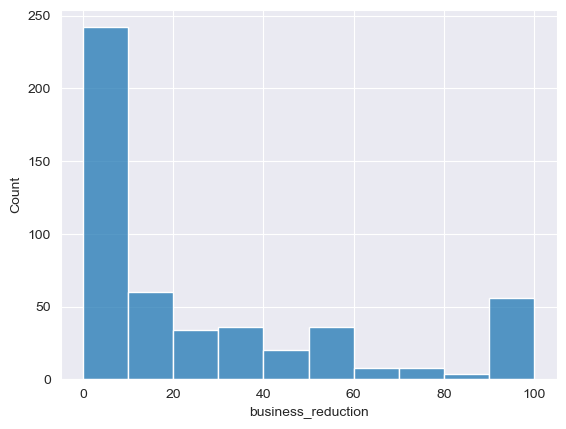

In [ ]:
# #all_input.groupby(all_input.columns.tolist(),as_index=False).size()
# t = all_input.drop_duplicates()
# t
fig, ax = plt.subplots()

d = all_input.filter(regex="business",axis=1)
d = d.replace(r'^,', '0.', regex=True) 
d = d.replace(r',', '.', regex=True) 
d = d.replace(' ', 99) 

d = d.replace("", np.nan) 
d = d.replace(np.nan, 99) 

d#.value_counts()
sns.histplot(data=d.Target_businessreduction)
#ax.set_yscale('log')
#ax.set_ylim(0,100)
#ax.set_xlim(0,100)


TypeError: 'NoneType' object is not iterable

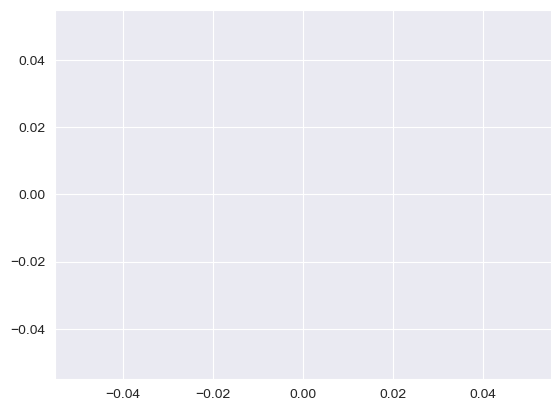

In [ ]:
fig, ax = plt.subplots()
d = all_input.filter(regex="Target",axis=1)
#d = d.drop(["contaminations_s.99", "contaminations_s.88"], axis=1)
#sns.histplot(bins=3, data=d, multiple="stack")
d = d.replace(r'^,', '0.', regex=True) 
d = d.replace(',', '.') 
sns.histplot(data=d)

#ax.set_yscale('log')
#ax.set_ylabel("")
#ax.legend(['no contamination', 'sewage water', 'fuel oil', 'chemicals', 'garbage'])

ax.set_title(f"Contamination types: \nContamination with fuel oil occures {all_input['contaminations.3'].value_counts()[1]} times")


### Distribution targets 


In [1]:
df = df.replace("^,", "0.", regex=True) 
df = df.replace(",", ".", regex=True) 


df_targets = df[["Target_directloss_mVND_r", "Target_directloss_mVND_s"]]
fig, (ax_hist) = plt.subplots(len(df_targets), 2, sharex=False, figsize=(7, 40), constrained_layout=True)#, gridspec_kw={"height_ratios": (.15, .85)})
#fig.tight_layout()  # alternative for tight_layout() and subplots_adjust(): constrained_layout=True
fig.suptitle('Distributions of target variables')

for i, c in enumerate(df_targets.columns[:]):
    #plt.subplots_adjust(hspace=.2)
    sns.boxplot(x=df_targets[c].astype(float), ax=ax_hist[i, 0]).set(title=f"{c}", xlabel=None)
    sns.histplot(x=df_targets[c].astype(float), stat='count', ax=ax_hist[i, 1]).set(title=f"{c}", xlabel=None) # bins=12, stat="percent"


## TODO : shp_closed, shp_duration_back2normal, shp_damage_level from conitnous -> intervals

# sns.despine(ax=ax_hist)  # arrange boxplots above bar charts
# sns.despine(ax=ax_box, left=True)
# ax_box.set(yticks=[])


NameError: name 'df' is not defined

TypeError: 'NoneType' object is not iterable

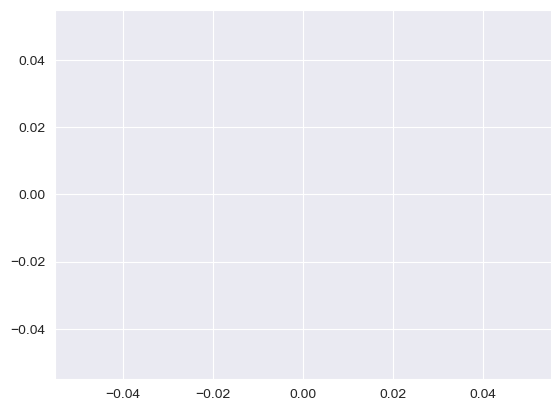

In [ ]:
fig, ax = plt.subplots()
d = all_input.filter(regex="Target",axis=1)
#d = d.drop(["contaminations_s.99", "contaminations_s.88"], axis=1)
#sns.histplot(bins=3, data=d, multiple="stack")
d = d.replace(r'^,', '0.', regex=True) 
d = d.replace(',', '.') 
sns.histplot(data=d)

#ax.set_yscale('log')
#ax.set_ylabel("")
#ax.legend(['no contamination', 'sewage water', 'fuel oil', 'chemicals', 'garbage'])

ax.set_title(f"Contamination types: \nContamination with fuel oil occures {all_input['contaminations.3'].value_counts()[1]} times")


In [ ]:
df_targets = df[["Target_direct_r", "Target_direct_s"]]
fig, (ax_hist) = plt.subplots(len(df_targets), 2, sharex=False, figsize=(7, 40), constrained_layout=True)#, gridspec_kw={"height_ratios": (.15, .85)})
#fig.tight_layout()  # alternative for tight_layout() and subplots_adjust(): constrained_layout=True
fig.suptitle('Distributions of target variables')

for i, c in enumerate(df_targets.columns[:]):
    #plt.subplots_adjust(hspace=.2)
    sns.boxplot(x=df_targets[c].astype(float), ax=ax_hist[i, 0]).set(title=f"{c}", xlabel=None)
    sns.histplot(x=df_targets[c].astype(float), stat='count', ax=ax_hist[i, 1]).set(title=f"{c}", xlabel=None) # bins=12, stat="percent"


## TODO : shp_closed, shp_duration_back2normal, shpdamage_level from conitnous -> intervals

# sns.despine(ax=ax_hist)  # arrange boxplots above bar charts
# sns.despine(ax=ax_box, left=True)
# ax_box.set(yticks=[])


NameError: name 'df' is not defined

In [160]:
## save to disk
df_candidates_combined.to_excel("../input_survey_data/survey_data_candidates_coords.xlsx", index=False)



## TODO possible further candidates which needs to be checked and maybe developed: 
## - Indicator of flood warning information 
## - Lead time period elapsed without using it for emergency measure
## - Precautionary measure indicator
## - Knowledge of flood hazard	- as binary
## - Building quality	(Content value in USD - not in HCMC survey data, only indirect derivable via shp_sector)
## - Socioeconomic status according to Plapp [31]
##      'P1Q5.2.2':'shp_damage_level_furniture', 'P1Q5.3.2':'shp_damage_level_electronics', "shp_damage_level_others"

## Create indicators
indictator for precautionary measure
- as a ratio between b measures implemented prior to the flood (nI) divided by the nb measures potentailly could have implemented (nP)
- (https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020WR027649)
- ! check out paper from Sieg et al. (2017) - they didnt combined adapt+mitig+emerg= have more predictors

Maybe socio-economic status indicator:
- according to Plapp 2003, applied by Thieken et al 2005

indicator of warning information, 
indicator of emergency measures, 
perception of efficiency of private precaution, 
building quality, 
building/content value
